In [41]:
# Import required libraries for data analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.1
NumPy version: 1.26.4


In [77]:
# Load the Excel file
excel_file = "EN Blk Room Temperature - Copy.xlsx"

try:
    # First, let's see what sheets are available in the Excel file
    excel_sheets = pd.ExcelFile(excel_file)
    print("Available sheets in the Excel file:")
    for i, sheet in enumerate(excel_sheets.sheet_names):
        print(f"{i+1}. {sheet}")
    
    # Load the first sheet (or you can specify a specific sheet name)
    df = pd.read_excel(excel_file, sheet_name=0)  # Load first sheet
    
    print(f"\nSuccessfully loaded data from: {excel_file}")
    print(f"Dataset shape: {df.shape}")
    
except FileNotFoundError:
    print(f"Error: Could not find the file '{excel_file}'")
    print("Please make sure the file is in the current directory.")
except Exception as e:
    print(f"Error loading file: {e}")

Available sheets in the Excel file:
1. report1727855728751

Successfully loaded data from: EN Blk Room Temperature - Copy.xlsx
Dataset shape: (2380, 21)


In [78]:
# Initial Data Exploration
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n=== FIRST FEW ROWS ===")
print(df.head())

print("\n=== DATA TYPES ===")
print(df.dtypes)

print("\n=== BASIC STATISTICS ===")
print(df.describe())

print("\n=== MISSING VALUES ===")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

=== DATASET OVERVIEW ===
Shape: (2380, 21)
Columns: ['Time', 'EN10-5-16 FCU 5-9', 'EN10-5-16 FCU 5-10', 'EN10-6-17 FCU 6-7', 'EN10-6-17 FCU 6-8', 'EN10-6-23 FCU 6-1', 'EN10-6-23 FCU 6-2', 'EN14-5-62 FCU 5-7', 'EN14-5-62 FCU 5-8', 'EN14-6-61 FCU 6-1', 'EN14-6-61 FCU 6-2', 'EN17-5-88 FCU 5-7', 'EN17-5-88 FCU 5-8', 'EN21-4-83 FCU 4-13', 'EN21-4-83 FCU 4-14', 'EN22-5-131 FCU 5-7', 'EN22-5-131 FCU 5-8', 'EN22-6-160 FCU 6-5', 'EN22-6-160 FCU 6-6', 'EN22-6-162 FCU 6-1', 'EN22-6-162 FCU 6-2']

=== FIRST FEW ROWS ===
                 Time  EN10-5-16 FCU 5-9  EN10-5-16 FCU 5-10  \
0 2024-08-01 00:00:00               26.5                24.7   
1 2024-08-01 00:15:00               26.5                24.7   
2 2024-08-01 00:30:00               26.5                24.7   
3 2024-08-01 00:45:00               26.5                24.8   
4 2024-08-01 01:15:00               26.5                24.8   

   EN10-6-17 FCU 6-7  EN10-6-17 FCU 6-8  EN10-6-23 FCU 6-1  EN10-6-23 FCU 6-2  \
0               26.6

In [79]:
# Data Cleaning and Preprocessing
print("=== DATA CLEANING ===")

# Create a copy for cleaning
df_clean = df.copy()

#delete first two rows 
df_clean = df.iloc[2:].reset_index(drop=True)
# Check for and handle missing values
print("Missing values before cleaning:")
print(df_clean.isnull().sum())

# Remove rows with all NaN values
df_clean = df_clean.dropna(how='all')

# For temperature data, let's identify numeric columns
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumeric columns found: {numeric_columns}")

# Check for potential date/time columns
date_columns = []
for col in df_clean.columns:
    if any(keyword in col.lower() for keyword in ['date', 'time', 'timestamp']):
        date_columns.append(col)
        
print(f"Potential date/time columns: {date_columns}")

# Display info about cleaned dataset
print(f"\nDataset shape after cleaning: {df_clean.shape}")
print(f"Original shape: {df.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

# Show sample of cleaned data
print("\n=== CLEANED DATA SAMPLE ===")
print(df_clean.head())

=== DATA CLEANING ===
Missing values before cleaning:
Time                  0
EN10-5-16 FCU 5-9     0
EN10-5-16 FCU 5-10    0
EN10-6-17 FCU 6-7     0
EN10-6-17 FCU 6-8     0
EN10-6-23 FCU 6-1     0
EN10-6-23 FCU 6-2     0
EN14-5-62 FCU 5-7     0
EN14-5-62 FCU 5-8     0
EN14-6-61 FCU 6-1     0
EN14-6-61 FCU 6-2     0
EN17-5-88 FCU 5-7     0
EN17-5-88 FCU 5-8     0
EN21-4-83 FCU 4-13    0
EN21-4-83 FCU 4-14    0
EN22-5-131 FCU 5-7    0
EN22-5-131 FCU 5-8    0
EN22-6-160 FCU 6-5    0
EN22-6-160 FCU 6-6    0
EN22-6-162 FCU 6-1    0
EN22-6-162 FCU 6-2    0
dtype: int64

Numeric columns found: ['EN10-5-16 FCU 5-9', 'EN10-5-16 FCU 5-10', 'EN10-6-17 FCU 6-7', 'EN10-6-17 FCU 6-8', 'EN10-6-23 FCU 6-1', 'EN10-6-23 FCU 6-2', 'EN14-5-62 FCU 5-7', 'EN14-5-62 FCU 5-8', 'EN14-6-61 FCU 6-1', 'EN14-6-61 FCU 6-2', 'EN17-5-88 FCU 5-7', 'EN17-5-88 FCU 5-8', 'EN21-4-83 FCU 4-13', 'EN21-4-83 FCU 4-14', 'EN22-5-131 FCU 5-7', 'EN22-5-131 FCU 5-8', 'EN22-6-160 FCU 6-5', 'EN22-6-160 FCU 6-6', 'EN22-6-162 FCU 6-1

Temperature columns for analysis: ['EN10-5-16 FCU 5-9', 'EN10-5-16 FCU 5-10', 'EN10-6-17 FCU 6-7', 'EN10-6-17 FCU 6-8', 'EN10-6-23 FCU 6-1', 'EN10-6-23 FCU 6-2', 'EN14-5-62 FCU 5-7', 'EN14-5-62 FCU 5-8', 'EN14-6-61 FCU 6-1', 'EN14-6-61 FCU 6-2', 'EN17-5-88 FCU 5-7', 'EN17-5-88 FCU 5-8', 'EN21-4-83 FCU 4-13', 'EN21-4-83 FCU 4-14', 'EN22-5-131 FCU 5-7', 'EN22-5-131 FCU 5-8', 'EN22-6-160 FCU 6-5', 'EN22-6-160 FCU 6-6', 'EN22-6-162 FCU 6-1', 'EN22-6-162 FCU 6-2']
Numeric temperature columns: ['EN10-5-16 FCU 5-9', 'EN10-5-16 FCU 5-10', 'EN10-6-17 FCU 6-7', 'EN10-6-17 FCU 6-8', 'EN10-6-23 FCU 6-1', 'EN10-6-23 FCU 6-2', 'EN14-5-62 FCU 5-7', 'EN14-5-62 FCU 5-8', 'EN14-6-61 FCU 6-1', 'EN14-6-61 FCU 6-2', 'EN17-5-88 FCU 5-7', 'EN17-5-88 FCU 5-8', 'EN21-4-83 FCU 4-13', 'EN21-4-83 FCU 4-14', 'EN22-5-131 FCU 5-7', 'EN22-5-131 FCU 5-8', 'EN22-6-160 FCU 6-5', 'EN22-6-160 FCU 6-6', 'EN22-6-162 FCU 6-1', 'EN22-6-162 FCU 6-2']


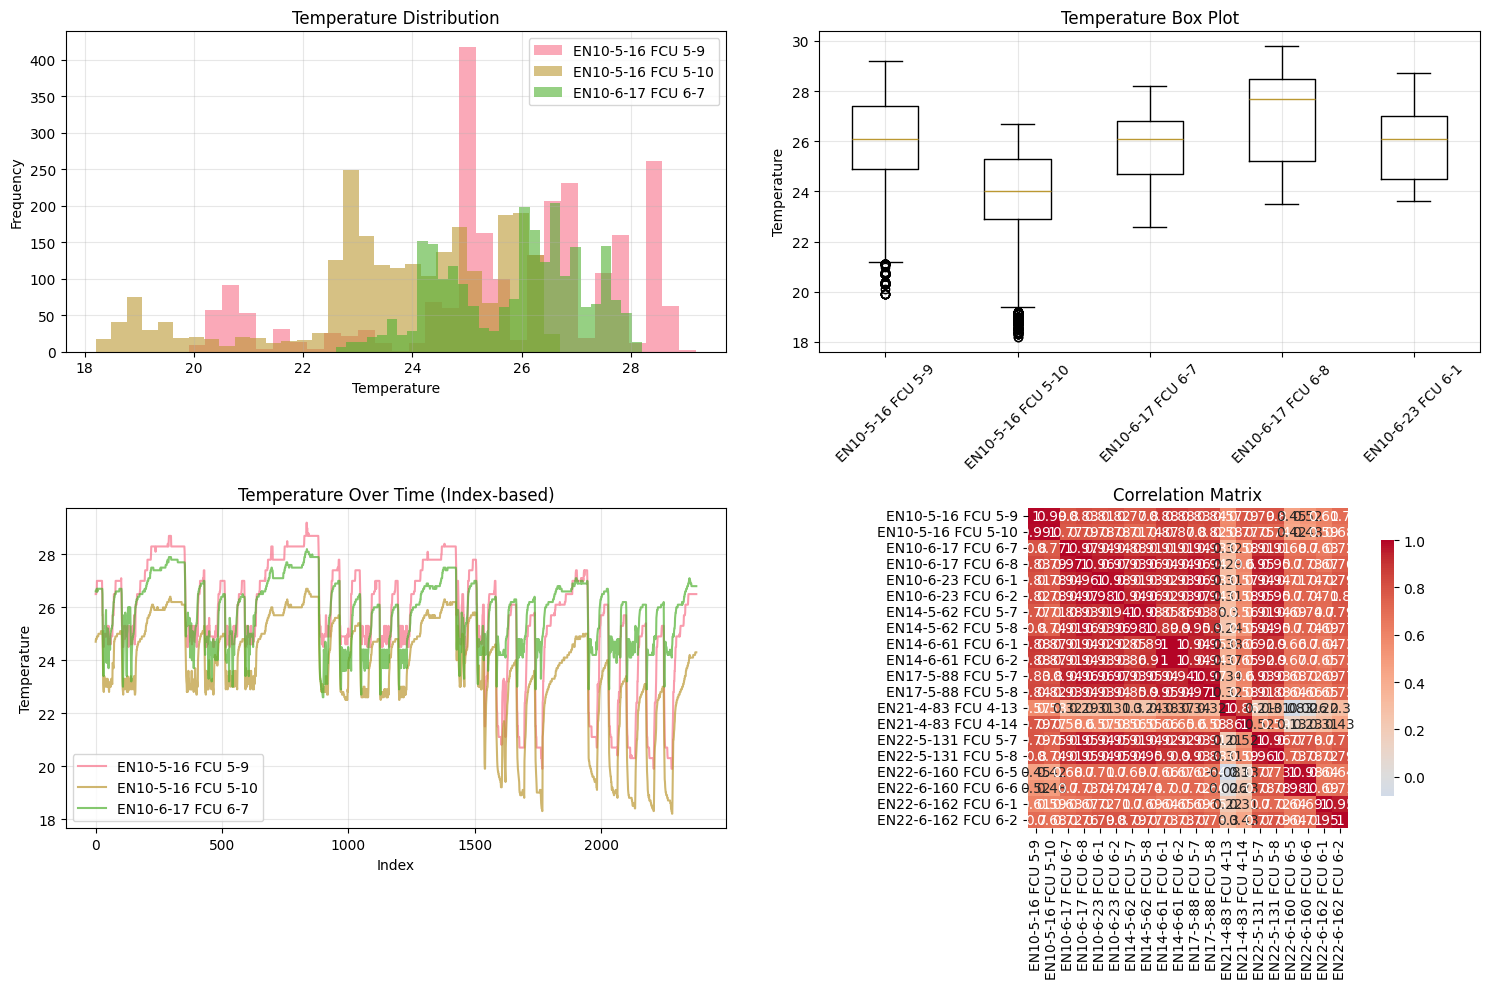

In [80]:
# Temperature Data Visualization
plt.figure(figsize=(15, 10))

# Find temperature-related columns
temp_columns = [col for col in df_clean.columns if 'Unnamed' in col.lower() or 'Unnamed:' in col.lower()]
if not temp_columns:
    # If no specific temperature columns, use all numeric columns
    temp_columns = numeric_columns

print(f"Temperature columns for analysis: {temp_columns}")

# Filter temp_columns to only include numeric columns
numeric_temp_columns = []
for col in temp_columns:
    if col in df_clean.columns and df_clean[col].dtype in ['float64', 'int64', 'float32', 'int32']:
        numeric_temp_columns.append(col)

print(f"Numeric temperature columns: {numeric_temp_columns}")

if numeric_temp_columns:
    # Plot 1: Distribution of temperature values
    plt.subplot(2, 2, 1)
    for col in numeric_temp_columns[:3]:  # Limit to first 3 columns to avoid clutter
        data = df_clean[col].dropna()
        if len(data) > 0:
            plt.hist(data, alpha=0.6, label=col, bins=30)
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Box plot for temperature data
    plt.subplot(2, 2, 2)
    try:
        # Prepare data for boxplot - ensure all data is numeric
        temp_data = []
        temp_labels = []
        for col in numeric_temp_columns[:5]:  # Limit to 5 columns
            data = df_clean[col].dropna()
            if len(data) > 0:
                # Convert to numeric if not already
                numeric_data = pd.to_numeric(data, errors='coerce').dropna()
                if len(numeric_data) > 0:
                    temp_data.append(numeric_data)
                    temp_labels.append(col)
        
        if temp_data:
            plt.boxplot(temp_data, labels=temp_labels)
            plt.title('Temperature Box Plot')
            plt.ylabel('Temperature')
            plt.xticks(rotation=45)
            plt.grid(True, alpha=0.3)
        else:
            plt.text(0.5, 0.5, 'No valid numeric data\nfor box plot', 
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Temperature Box Plot')
    except Exception as e:
        plt.text(0.5, 0.5, f'Error creating box plot:\n{str(e)}', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Temperature Box Plot - Error')

    # Plot 3: Time series if we have sequential data
    plt.subplot(2, 2, 3)
    if len(numeric_temp_columns) > 0:
        for col in numeric_temp_columns[:3]:
            data = df_clean[col].dropna()
            if len(data) > 0:
                # Convert to numeric if not already
                numeric_data = pd.to_numeric(data, errors='coerce').dropna()
                if len(numeric_data) > 0:
                    plt.plot(numeric_data.index, numeric_data, label=col, alpha=0.7)
        plt.title('Temperature Over Time (Index-based)')
        plt.xlabel('Index')
        plt.ylabel('Temperature')
        plt.legend()
        plt.grid(True, alpha=0.3)

    # Plot 4: Correlation heatmap if multiple numeric columns
    plt.subplot(2, 2, 4)
    if len(numeric_columns) > 1:
        try:
            # Select only numeric columns for correlation
            numeric_data = df_clean[numeric_columns].select_dtypes(include=[np.number])
            if numeric_data.shape[1] > 1:
                correlation_matrix = numeric_data.corr()
                sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                           square=True, cbar_kws={'shrink': .8})
                plt.title('Correlation Matrix')
            else:
                plt.text(0.5, 0.5, 'Not enough numeric\ncolumns for correlation', 
                        ha='center', va='center', transform=plt.gca().transAxes)
                plt.title('Correlation Matrix')
        except Exception as e:
            plt.text(0.5, 0.5, f'Error creating correlation:\n{str(e)}', 
                    ha='center', va='center', transform=plt.gca().transAxes)
            plt.title('Correlation Matrix - Error')
    else:
        plt.text(0.5, 0.5, 'Not enough numeric\ncolumns for correlation', 
                ha='center', va='center', transform=plt.gca().transAxes)
        plt.title('Correlation Matrix')

    plt.tight_layout()
    plt.show()
else:
    print("No numeric temperature columns found for visualization.")
    print("Available columns and their types:")
    for col in df_clean.columns:
        print(f"  {col}: {df_clean[col].dtype}")

In [81]:
# Statistical Analysis and Sensor Drift Detection with Temperature Range Compliance
print("=== STATISTICAL ANALYSIS ===")

# Define acceptable temperature range
TEMP_MIN = 24.5  # Minimum acceptable temperature (°C)
TEMP_MAX = 25.5  # Maximum acceptable temperature (°C)
TEMP_OPTIMAL = (TEMP_MIN + TEMP_MAX) / 2  # Optimal temperature (25.0°C)

print(f"Temperature specifications:")
print(f"  Acceptable range: {TEMP_MIN}°C - {TEMP_MAX}°C")
print(f"  Optimal temperature: {TEMP_OPTIMAL}°C")

# Use the same filtering as visualization
if 'numeric_temp_columns' in locals():
    analysis_columns = numeric_temp_columns
else:
    # Fallback if variables not available
    temp_columns = [col for col in df_clean.columns if 'temp' in col.lower() or 'temperature' in col.lower()]
    if not temp_columns:
        temp_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    analysis_columns = [col for col in temp_columns if df_clean[col].dtype in ['float64', 'int64', 'float32', 'int32']]

if analysis_columns:
    for col in analysis_columns:
        data = df_clean[col].dropna()
        # Ensure data is numeric
        data = pd.to_numeric(data, errors='coerce').dropna()
        
        if len(data) > 0:
            print(f"\n--- Analysis for {col} ---")
            print(f"Count: {len(data)}")
            print(f"Mean: {data.mean():.2f}°C")
            print(f"Median: {data.median():.2f}°C")
            print(f"Std Dev: {data.std():.2f}°C")
            print(f"Min: {data.min():.2f}°C")
            print(f"Max: {data.max():.2f}°C")
            print(f"Range: {data.max() - data.min():.2f}°C")
            
            # Temperature range compliance
            in_range = ((data >= TEMP_MIN) & (data <= TEMP_MAX)).sum()
            compliance_rate = (in_range / len(data)) * 100
            print(f"Temperature compliance: {compliance_rate:.1f}% ({in_range}/{len(data)} readings)")
            
            # Categorize readings
            very_low = (data < TEMP_MIN - 1.0).sum()
            low = ((data >= TEMP_MIN - 1.0) & (data < TEMP_MIN)).sum()
            normal = ((data >= TEMP_MIN) & (data <= TEMP_MAX)).sum()
            high = ((data > TEMP_MAX) & (data <= TEMP_MAX + 1.0)).sum()
            very_high = (data > TEMP_MAX + 1.0).sum()
            
            print(f"Reading categories:")
            print(f"  Very Low (<{TEMP_MIN-1.0}°C): {very_low} ({very_low/len(data)*100:.1f}%)")
            print(f"  Low ({TEMP_MIN-1.0}-{TEMP_MIN}°C): {low} ({low/len(data)*100:.1f}%)")
            print(f"  Normal ({TEMP_MIN}-{TEMP_MAX}°C): {normal} ({normal/len(data)*100:.1f}%)")
            print(f"  High ({TEMP_MAX}-{TEMP_MAX+1.0}°C): {high} ({high/len(data)*100:.1f}%)")
            print(f"  Very High (>{TEMP_MAX+1.0}°C): {very_high} ({very_high/len(data)*100:.1f}%)")
            
            # Check for potential sensor drift
            if len(data) > 10:
                window_size = min(len(data) // 4, 50)  # Adaptive window size
                rolling_mean = data.rolling(window=window_size).mean()
                
                # Calculate trend (linear regression slope)
                x = np.arange(len(data))
                slope = np.polyfit(x, data, 1)[0]
                
                print(f"Trend (slope): {slope:.6f}°C per reading")
                if abs(slope) > 0.001:  # Threshold for significant drift
                    direction = "increasing" if slope > 0 else "decreasing"
                    print(f"⚠️  Potential sensor drift detected: {direction} trend")
                else:
                    print("✅ No significant sensor drift detected")
                
                # Outlier detection using temperature range
                temp_outliers = data[(data < TEMP_MIN - 0.5) | (data > TEMP_MAX + 0.5)]
                print(f"Temperature outliers: {len(temp_outliers)} ({len(temp_outliers)/len(data)*100:.1f}% of data)")
                
                if len(temp_outliers) > 0:
                    print(f"Outlier range: {temp_outliers.min():.2f}°C to {temp_outliers.max():.2f}°C")

print("\n=== OVERALL ASSESSMENT ===")
valid_sensors = len([col for col in analysis_columns if len(pd.to_numeric(df_clean[col].dropna(), errors='coerce').dropna()) > 0])
print(f"Total sensors analyzed: {valid_sensors}")
print(f"Dataset time span: {len(df_clean)} data points")

# Calculate coefficient of variation for each sensor
print("\n=== SENSOR STABILITY (Coefficient of Variation) ===")
for col in analysis_columns:
    data = pd.to_numeric(df_clean[col].dropna(), errors='coerce').dropna()
    if len(data) > 0 and data.mean() != 0:
        cv = (data.std() / data.mean()) * 100
        print(f"{col}: {cv:.2f}% (Lower is more stable)")
        if cv > 5:
            print(f"  ⚠️  High variability detected")
        elif cv < 1:
            print(f"  ✅ Very stable sensor")
        else:
            print(f"  ✅ Good stability")
else:
    print("No valid numeric columns found for analysis.")

=== STATISTICAL ANALYSIS ===
Temperature specifications:
  Acceptable range: 24.5°C - 25.5°C
  Optimal temperature: 25.0°C

--- Analysis for EN10-5-16 FCU 5-9 ---
Count: 2378
Mean: 25.66°C
Median: 26.10°C
Std Dev: 2.19°C
Min: 19.90°C
Max: 29.20°C
Range: 9.30°C
Temperature compliance: 29.8% (708/2378 readings)
Reading categories:
  Very Low (<23.5°C): 338 (14.2%)
  Low (23.5-24.5°C): 24 (1.0%)
  Normal (24.5-25.5°C): 708 (29.8%)
  High (25.5-26.5°C): 422 (17.7%)
  Very High (>26.5°C): 886 (37.3%)
Trend (slope): -0.001491°C per reading
⚠️  Potential sensor drift detected: decreasing trend
Temperature outliers: 1544 (64.9% of data)
Outlier range: 19.90°C to 29.20°C

--- Analysis for EN10-5-16 FCU 5-10 ---
Count: 2378
Mean: 23.71°C
Median: 24.00°C
Std Dev: 2.04°C
Min: 18.20°C
Max: 26.70°C
Range: 8.50°C
Temperature compliance: 20.3% (483/2378 readings)
Reading categories:
  Very Low (<23.5°C): 1023 (43.0%)
  Low (23.5-24.5°C): 339 (14.3%)
  Normal (24.5-25.5°C): 483 (20.3%)
  High (25.5-26.

In [82]:
# Advanced Analysis and Data Export with Temperature Compliance
print("=== ADVANCED ANALYSIS ===")

# Temperature specifications
TEMP_MIN = 24.5  
TEMP_MAX = 25.5  
TEMP_OPTIMAL = 25.0  

# Use consistent column filtering
if 'analysis_columns' in locals():
    temp_columns = analysis_columns
else:
    # Fallback if variables not available
    temp_columns = [col for col in df_clean.columns if 'temp' in col.lower() or 'temperature' in col.lower()]
    if not temp_columns:
        temp_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    temp_columns = [col for col in temp_columns if df_clean[col].dtype in ['float64', 'int64', 'float32', 'int32']]

# Create a summary report
summary_data = []

for col in temp_columns:
    data = df_clean[col].dropna()
    # Ensure data is numeric
    data = pd.to_numeric(data, errors='coerce').dropna()
    
    if len(data) > 0:
        # Calculate statistics
        x = np.arange(len(data))
        slope = np.polyfit(x, data, 1)[0] if len(data) > 1 else 0
        cv = (data.std() / data.mean()) * 100 if data.mean() != 0 else 0
        
        # Temperature compliance metrics
        in_range = ((data >= TEMP_MIN) & (data <= TEMP_MAX)).sum()
        compliance_rate = (in_range / len(data)) * 100
        
        # Temperature range outliers
        temp_outliers = data[(data < TEMP_MIN - 0.5) | (data > TEMP_MAX + 0.5)]
        
        # Deviation from optimal
        avg_deviation = abs(data.mean() - TEMP_OPTIMAL)
        
        summary_data.append({
            'Sensor': col,
            'Count': len(data),
            'Mean': round(data.mean(), 2),
            'Std_Dev': round(data.std(), 2),
            'Min': round(data.min(), 2),
            'Max': round(data.max(), 2),
            'Compliance_Rate_%': round(compliance_rate, 1),
            'Avg_Deviation_from_Optimal': round(avg_deviation, 2),
            'Coefficient_of_Variation_%': round(cv, 2),
            'Trend_Slope': round(slope, 6),
            'Temp_Outliers_Count': len(temp_outliers),
            'Temp_Outliers_Percentage': round(len(temp_outliers)/len(data)*100, 1)
        })

# Create summary DataFrame
if summary_data:
    summary_df = pd.DataFrame(summary_data)
    print("SENSOR SUMMARY REPORT:")
    print(summary_df.to_string(index=False))
    
    # Export summary to Excel
    try:
        summary_df.to_excel('sensor_analysis_summary.xlsx', index=False)
        print(f"\n✅ Summary report exported to: sensor_analysis_summary.xlsx")
    except Exception as e:
        print(f"Could not export summary: {e}")

print("\n=== TEMPERATURE COMPLIANCE RECOMMENDATIONS ===")
if summary_data:
    for sensor_data in summary_data:
        sensor_name = sensor_data['Sensor']
        compliance = sensor_data['Compliance_Rate_%']
        avg_deviation = sensor_data['Avg_Deviation_from_Optimal']
        temp_outliers_pct = sensor_data['Temp_Outliers_Percentage']
        
        print(f"\n{sensor_name}:")
        
        # Compliance assessment
        if compliance >= 95:
            print(f"  ✅ Excellent compliance ({compliance}%) - Within specifications")
        elif compliance >= 85:
            print(f"  ⚠️  Good compliance ({compliance}%) - Minor adjustments needed")
        elif compliance >= 70:
            print(f"  ⚠️  Moderate compliance ({compliance}%) - Requires attention")
        else:
            print(f"  ❌ Poor compliance ({compliance}%) - Immediate action required")
        
        # Deviation assessment
        if avg_deviation <= 0.2:
            print(f"  ✅ Excellent accuracy (±{avg_deviation}°C from optimal)")
        elif avg_deviation <= 0.5:
            print(f"  ⚠️  Good accuracy (±{avg_deviation}°C from optimal)")
        else:
            print(f"  ❌ Poor accuracy (±{avg_deviation}°C from optimal) - Calibration needed")
        
        # Temperature outlier assessment
        if temp_outliers_pct > 10:
            print(f"  ❌ High temperature outlier rate ({temp_outliers_pct}%) - System malfunction")
        elif temp_outliers_pct > 5:
            print(f"  ⚠️  Moderate outlier rate ({temp_outliers_pct}%) - Monitor closely")
        else:
            print(f"  ✅ Low outlier rate ({temp_outliers_pct}%) - Good performance")
else:
    print("No valid numeric data found for analysis.")

print(f"\n=== ANALYSIS COMPLETE ===")
print(f"Analysis completed at: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Total data points analyzed: {len(df_clean)}")
if summary_data:
    print(f"Number of sensors: {len(summary_data)}")
    overall_compliance = np.mean([s['Compliance_Rate_%'] for s in summary_data])
    print(f"Overall system compliance: {overall_compliance:.1f}%")
else:
    print("Number of sensors: 0")

=== ADVANCED ANALYSIS ===
SENSOR SUMMARY REPORT:
            Sensor  Count  Mean  Std_Dev  Min  Max  Compliance_Rate_%  Avg_Deviation_from_Optimal  Coefficient_of_Variation_%  Trend_Slope  Temp_Outliers_Count  Temp_Outliers_Percentage
 EN10-5-16 FCU 5-9   2378 25.66     2.19 19.9 29.2               29.8                        0.66                        8.54    -0.001491                 1544                      64.9
EN10-5-16 FCU 5-10   2378 23.71     2.04 18.2 26.7               20.3                        1.29                        8.59    -0.001516                 1399                      58.8
 EN10-6-17 FCU 6-7   2378 25.85     1.26 22.6 28.2               18.2                        0.85                        4.89    -0.000341                 1400                      58.9
 EN10-6-17 FCU 6-8   2378 26.97     1.68 23.5 29.8               28.8                        1.97                        6.24    -0.000381                 1458                      61.3
 EN10-6-23 FCU 6-1   

In [83]:
# Import additional libraries for anomaly detection
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, classification_report
    print("✅ TensorFlow imported successfully")
except ImportError:
    print("❌ TensorFlow not found. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'tensorflow'])
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, classification_report

try:
    from pgmpy.models import BayesianNetwork
    from pgmpy.factors.discrete import TabularCPD
    from pgmpy.inference import VariableElimination
    from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
    print("✅ pgmpy imported successfully")
except ImportError:
    print("❌ pgmpy not found. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'pgmpy'])
    from pgmpy.models import BayesianNetwork
    from pgmpy.factors.discrete import TabularCPD
    from pgmpy.inference import VariableElimination
    from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator

try:
    from scipy import stats
    from scipy.stats import zscore
    print("✅ Additional libraries imported successfully")
except ImportError:
    print("❌ Some libraries missing. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'scipy'])
    from scipy import stats
    from scipy.stats import zscore

print("All libraries loaded for anomaly detection!")

✅ TensorFlow imported successfully
✅ pgmpy imported successfully
✅ Additional libraries imported successfully
All libraries loaded for anomaly detection!


In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

print("=== DATA PREPARATION FOR ANOMALY DETECTION ===")

# Temperature specifications for identifying normal data
TEMP_MIN = 24.5  
TEMP_MAX = 25.5  
TEMP_OPTIMAL = 25.0  

print(f"Temperature specifications:")
print(f"  Acceptable range: {TEMP_MIN}°C - {TEMP_MAX}°C")
print(f"  Optimal temperature: {TEMP_OPTIMAL}°C")

# Use the numeric temperature columns we identified earlier
if 'temp_columns' in locals() and temp_columns:
    analysis_cols = temp_columns
else:
    # Fallback: use all numeric columns
    analysis_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print(f"Columns for anomaly detection: {analysis_cols}")

if len(analysis_cols) == 0:
    print("❌ No numeric columns found for anomaly detection!")
else:
    # Create a clean dataset for anomaly detection
    anomaly_data = df_clean[analysis_cols].copy()
    
    # Convert all columns to numeric, handling any remaining non-numeric values
    for col in analysis_cols:
        anomaly_data[col] = pd.to_numeric(anomaly_data[col], errors='coerce')
    
    # Remove rows with any NaN values
    anomaly_data = anomaly_data.dropna()
    
    print(f"Full dataset shape after cleaning: {anomaly_data.shape}")
    print(f"Columns: {list(anomaly_data.columns)}")
    
    # Check for constant columns (no variation)
    constant_cols = [col for col in anomaly_data.columns if anomaly_data[col].std() == 0]
    
    if constant_cols:
        print(f"\n⚠️ Constant columns detected (will be excluded): {constant_cols}")
        anomaly_data = anomaly_data.drop(columns=constant_cols)
        analysis_cols = [col for col in analysis_cols if col not in constant_cols]
    
    print(f"Final dataset shape: {anomaly_data.shape}")
    print(f"Final columns: {list(anomaly_data.columns)}")
    
    # === Separate normal data for training based on proximity to optimal temperature ===
    print(f"\n=== SEPARATING NORMAL DATA FOR TRAINING BASED ON PROXIMITY TO OPTIMAL TEMPERATURE ===")
    
    # Calculate mean absolute deviation from optimal temperature for each sample
    mean_abs_dev = anomaly_data.apply(lambda row: np.mean(np.abs(row - TEMP_OPTIMAL)), axis=1)
    
    # Select top 20% samples closest to optimal temperature as normal
    n_normal = int(len(anomaly_data) * 0.20)
    normal_indices = mean_abs_dev.nsmallest(n_normal).index
    normal_data = anomaly_data.loc[normal_indices]
    
    # Create true labels: normal=1, anomaly=0
    true_labels = pd.Series(0, index=anomaly_data.index)
    true_labels.loc[normal_indices] = 1
    
    print(f"Selected {len(normal_data)} normal samples (~{len(normal_data)/len(anomaly_data)*100:.1f}%) based on closeness to optimal temperature.")
    
    # Prepare features for machine learning
    X_full = anomaly_data.values
    X_normal = normal_data.values
    
    # Scale data based on normal data only
    scaler = StandardScaler()
    X_normal_scaled = scaler.fit_transform(X_normal)
    X_full_scaled = scaler.transform(X_full)
    
    # Masks for normal and anomaly samples
    normal_mask = true_labels.astype(bool)
    anomaly_mask = ~normal_mask
    
    # Store data splits for model training
    data_splits = {
        'X_normal': X_normal_scaled,
        'X_full': X_full_scaled,
        'true_labels': true_labels.values,
        'normal_indices': np.where(normal_mask)[0],
        'anomaly_indices': np.where(anomaly_mask)[0],
        'scaler': scaler,
        'original_data': anomaly_data,
        'normal_data': normal_data
    }
    
    print(f"\n✅ Data prepared successfully!")
    print(f"Normal training data shape: {X_normal_scaled.shape}")
    print(f"Full dataset shape: {X_full_scaled.shape}")
    print(f"True normal samples: {normal_mask.sum()}/{len(normal_mask)} ({normal_mask.sum()/len(normal_mask)*100:.1f}%)")


=== DATA PREPARATION FOR ANOMALY DETECTION ===
Temperature specifications:
  Acceptable range: 24.5°C - 25.5°C
  Optimal temperature: 25.0°C
Columns for anomaly detection: ['EN10-5-16 FCU 5-9', 'EN10-5-16 FCU 5-10', 'EN10-6-17 FCU 6-7', 'EN10-6-17 FCU 6-8', 'EN10-6-23 FCU 6-1', 'EN10-6-23 FCU 6-2', 'EN14-5-62 FCU 5-7', 'EN14-5-62 FCU 5-8', 'EN14-6-61 FCU 6-1', 'EN14-6-61 FCU 6-2', 'EN17-5-88 FCU 5-7', 'EN17-5-88 FCU 5-8', 'EN21-4-83 FCU 4-13', 'EN21-4-83 FCU 4-14', 'EN22-5-131 FCU 5-7', 'EN22-5-131 FCU 5-8', 'EN22-6-160 FCU 6-5', 'EN22-6-160 FCU 6-6', 'EN22-6-162 FCU 6-1', 'EN22-6-162 FCU 6-2']
Full dataset shape after cleaning: (2378, 20)
Columns: ['EN10-5-16 FCU 5-9', 'EN10-5-16 FCU 5-10', 'EN10-6-17 FCU 6-7', 'EN10-6-17 FCU 6-8', 'EN10-6-23 FCU 6-1', 'EN10-6-23 FCU 6-2', 'EN14-5-62 FCU 5-7', 'EN14-5-62 FCU 5-8', 'EN14-6-61 FCU 6-1', 'EN14-6-61 FCU 6-2', 'EN17-5-88 FCU 5-7', 'EN17-5-88 FCU 5-8', 'EN21-4-83 FCU 4-13', 'EN21-4-83 FCU 4-14', 'EN22-5-131 FCU 5-7', 'EN22-5-131 FCU 5-8', '

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

try:
    from tensorflow.keras.optimizers import AdamW
except ImportError:
    AdamW = None

def autoencoder_anomaly_detection(
    X_normal, X_full, true_labels, scaler,
    TEMP_MIN=None, TEMP_MAX=None, 
    normal_indices=None, anomaly_indices=None,
    original_data=None,
    max_epochs=150,
    labels_are_normal=True  # NEW: Set True if true_labels use 1=normal, 0=anomaly; False otherwise
):
    """
    Train an autoencoder on normal data and detect anomalies in the full dataset.

    Parameters
    ----------
    X_normal : np.ndarray
        Scaled normal samples for training.
    X_full : np.ndarray
        Scaled full dataset (normal + anomalies).
    true_labels : np.ndarray
        Ground truth labels: depending on labels_are_normal param.
    scaler : object
        Fitted scaler for inverse transform if needed.
    TEMP_MIN, TEMP_MAX : float, optional
        Min/max temperature for optional temperature plot.
    normal_indices, anomaly_indices : list/np.ndarray, optional
        Indices of normal and anomaly samples in X_full.
    original_data : np.ndarray, optional
        Original (unscaled) data for temperature plotting.
    max_epochs : int, optional
        Max training epochs for autoencoder.
    labels_are_normal : bool, optional
        Whether true_labels use 1=normal (True) or 1=anomaly (False).
    """

    n_features = X_normal.shape[1]
    print(f"=== AUTOENCODER ANOMALY DETECTION ===")
    print(f"Features: {n_features}")
    print(f"Training samples (normal): {len(X_normal)}")
    print(f"Testing samples (full): {len(X_full)}")

    # Build autoencoder
    input_dim = n_features
    encoding_dim = max(2, n_features // 2)

    input_layer = keras.Input(shape=(input_dim,))
    encoder = layers.Dense(encoding_dim * 2, activation='relu',
                           kernel_regularizer=keras.regularizers.l2(0.001))(input_layer)
    encoder = layers.Dense(encoding_dim, activation='relu',
                           kernel_regularizer=keras.regularizers.l2(0.001))(encoder)
    decoder = layers.Dense(encoding_dim * 2, activation='relu',
                           kernel_regularizer=keras.regularizers.l2(0.001))(encoder)
    decoder = layers.Dense(input_dim, activation='linear')(decoder)

    autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

    # Optimizer selection
    if AdamW is not None:
        optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)
        print("Using AdamW optimizer")
    else:
        optimizer = Adam(learning_rate=0.001)
        print("AdamW not available, using Adam optimizer")

    autoencoder.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    autoencoder.summary()

    # Train/validation split
    if len(X_normal) > 50:
        X_train, X_val = train_test_split(X_normal, test_size=0.3, random_state=42)
    else:
        X_train, X_val = X_normal, X_normal[:min(10, len(X_normal))]

    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                patience=5, min_lr=1e-6, verbose=1)

    history = autoencoder.fit(X_train, X_train,
                            epochs=max_epochs,
                            batch_size=min(32, max(8, len(X_train) // 4)),
                            validation_data=(X_val, X_val),
                            callbacks=[early_stopping, reduce_lr],
                            verbose=1,
                            shuffle=True)

    # Predictions and reconstruction errors
    X_full_pred = autoencoder.predict(X_full, verbose=0)
    reconstruction_errors = np.mean(np.power(X_full - X_full_pred, 2), axis=1)

    X_normal_pred = autoencoder.predict(X_normal, verbose=0)
    normal_errors = np.mean(np.power(X_normal - X_normal_pred, 2), axis=1)

    # Adjust labels if needed
    print("True labels distribution before adjustment:", np.bincount(true_labels))
    if labels_are_normal:
        # Convert labels: 1=normal => anomaly=1 for metrics
        y_true_anomaly = (true_labels == 0).astype(int)
        print("Assuming labels: 1=normal, 0=anomaly. Converted to anomaly=1 for metrics.")
    else:
        y_true_anomaly = true_labels
        print("Assuming labels: 1=anomaly, 0=normal.")

    # Find best threshold via precision-recall curve maximizing F1
    precisions, recalls, thresholds = precision_recall_curve(y_true_anomaly, reconstruction_errors)
    f1_scores = 2 * precisions * recalls / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    final_threshold = thresholds[best_idx]
    print(f"Selected threshold from PR curve maximizing F1: {final_threshold:.6f}")

    detected_anomalies = reconstruction_errors > final_threshold

    # Compute metrics
    precision = precision_score(y_true_anomaly, detected_anomalies, zero_division=0)
    recall = recall_score(y_true_anomaly, detected_anomalies, zero_division=0)
    f1 = f1_score(y_true_anomaly, detected_anomalies, zero_division=0)
    cm = confusion_matrix(y_true_anomaly, detected_anomalies)

    print("\n=== RESULTS ===")
    print(f"Threshold: {final_threshold:.6f}")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    print(f"Confusion Matrix:\n{cm}")

    # Visualizations
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()

    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Val Loss')
    axs[0].set_title('Loss Curve')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('MSE Loss')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(history.history['mae'], label='Train MAE')
    axs[1].plot(history.history['val_mae'], label='Val MAE')
    axs[1].set_title('MAE Curve')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('MAE')
    axs[1].legend()
    axs[1].grid(True)

    if normal_indices is not None and anomaly_indices is not None:
        axs[2].scatter(normal_indices, reconstruction_errors[normal_indices], 
                       c='blue', alpha=0.6, label='True Normal', s=20)
        axs[2].scatter(anomaly_indices, reconstruction_errors[anomaly_indices], 
                       c='red', alpha=0.8, label='True Anomaly', s=30)
    axs[2].axhline(final_threshold, color='purple', linestyle='--',
                   label=f'Threshold ({final_threshold:.4f})', linewidth=2)
    axs[2].set_title('Reconstruction Error by Sample')
    axs[2].set_xlabel('Sample Index')
    axs[2].set_ylabel('Reconstruction Error')
    axs[2].legend()
    axs[2].grid(True)

    axs[3].hist(normal_errors, bins=30, alpha=0.7, color='blue', label='Normal Errors', density=True)
    axs[3].hist(reconstruction_errors[detected_anomalies], bins=30, alpha=0.7, color='red', label='Anomaly Errors', density=True)
    axs[3].axvline(final_threshold, color='purple', linestyle='--', label='Threshold')
    axs[3].set_title('Error Distribution')
    axs[3].set_xlabel('Reconstruction Error')
    axs[3].set_ylabel('Density')
    axs[3].legend()
    axs[3].grid(True)

    precisions, recalls, thresholds = precision_recall_curve(y_true_anomaly, reconstruction_errors)
    axs[4].plot(recalls, precisions, label='Precision-Recall curve')
    axs[4].scatter(recall, precision, color='red', s=100, label='Operating Point')
    axs[4].set_title('Precision-Recall Curve')
    axs[4].set_xlabel('Recall')
    axs[4].set_ylabel('Precision')
    axs[4].legend()
    axs[4].grid(True)

    if TEMP_MIN is not None and TEMP_MAX is not None and original_data is not None:
        mean_temps = original_data.mean(axis=1)
        axs[5].scatter(mean_temps[~detected_anomalies], reconstruction_errors[~detected_anomalies],
                       c='blue', label='Normal', alpha=0.6)
        axs[5].scatter(mean_temps[detected_anomalies], reconstruction_errors[detected_anomalies],
                       c='red', label='Anomaly', alpha=0.8)
        axs[5].axhline(final_threshold, color='purple', linestyle='--')
        axs[5].axvline(TEMP_MIN, color='green', linestyle=':')
        axs[5].axvline(TEMP_MAX, color='green', linestyle=':')
        axs[5].set_title('Mean Temperature vs Reconstruction Error')
        axs[5].set_xlabel('Mean Temperature (°C)')
        axs[5].set_ylabel('Reconstruction Error')
        axs[5].legend()
        axs[5].grid(True)
    else:
        axs[5].axis('off')

    plt.tight_layout()
    plt.show()

    return {
        'model': autoencoder,
        'scaler': scaler,
        'threshold': final_threshold,
        'errors': reconstruction_errors,
        'normal_errors': normal_errors,
        'anomalies': detected_anomalies,
        'true_labels': y_true_anomaly,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }


=== AUTOENCODER ANOMALY DETECTION ===
Features: 20
Training samples (normal): 475
Testing samples (full): 2378
Using AdamW optimizer


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 20)             │           420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,270 (4.96 KB)

 Trainable params: 1,270 (4.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.1213 - mae: 0.8395 - val_loss: 1.0835 - val_mae: 0.8188 - learning_rate: 0.0010
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0268 - mae: 0.8033 - val_loss: 1.0317 - val_mae: 0.7989 - learning_rate: 0.0010
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9864 - mae: 0.7916 - val_loss: 0.9955 - val_mae: 0.7839 - learning_rate: 0.0010
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9835 - mae: 0.7876 - val_loss: 0.9652 - val_mae: 0.7698 - learning_rate: 0.0010
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9498 - mae: 0.7707 - val_loss: 0.9366 - val_mae: 0.7550 - learning_rate: 0.0010
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8972 - mae: 0.7510 - val_loss: 0.9086 - val_mae: 0.7400 - learning_rate: 0.0010
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8889 - mae: 0.7430 - val_loss: 0.8804 - val_mae: 0.7245 - learning_rate: 0.0010
Epoch 8/150


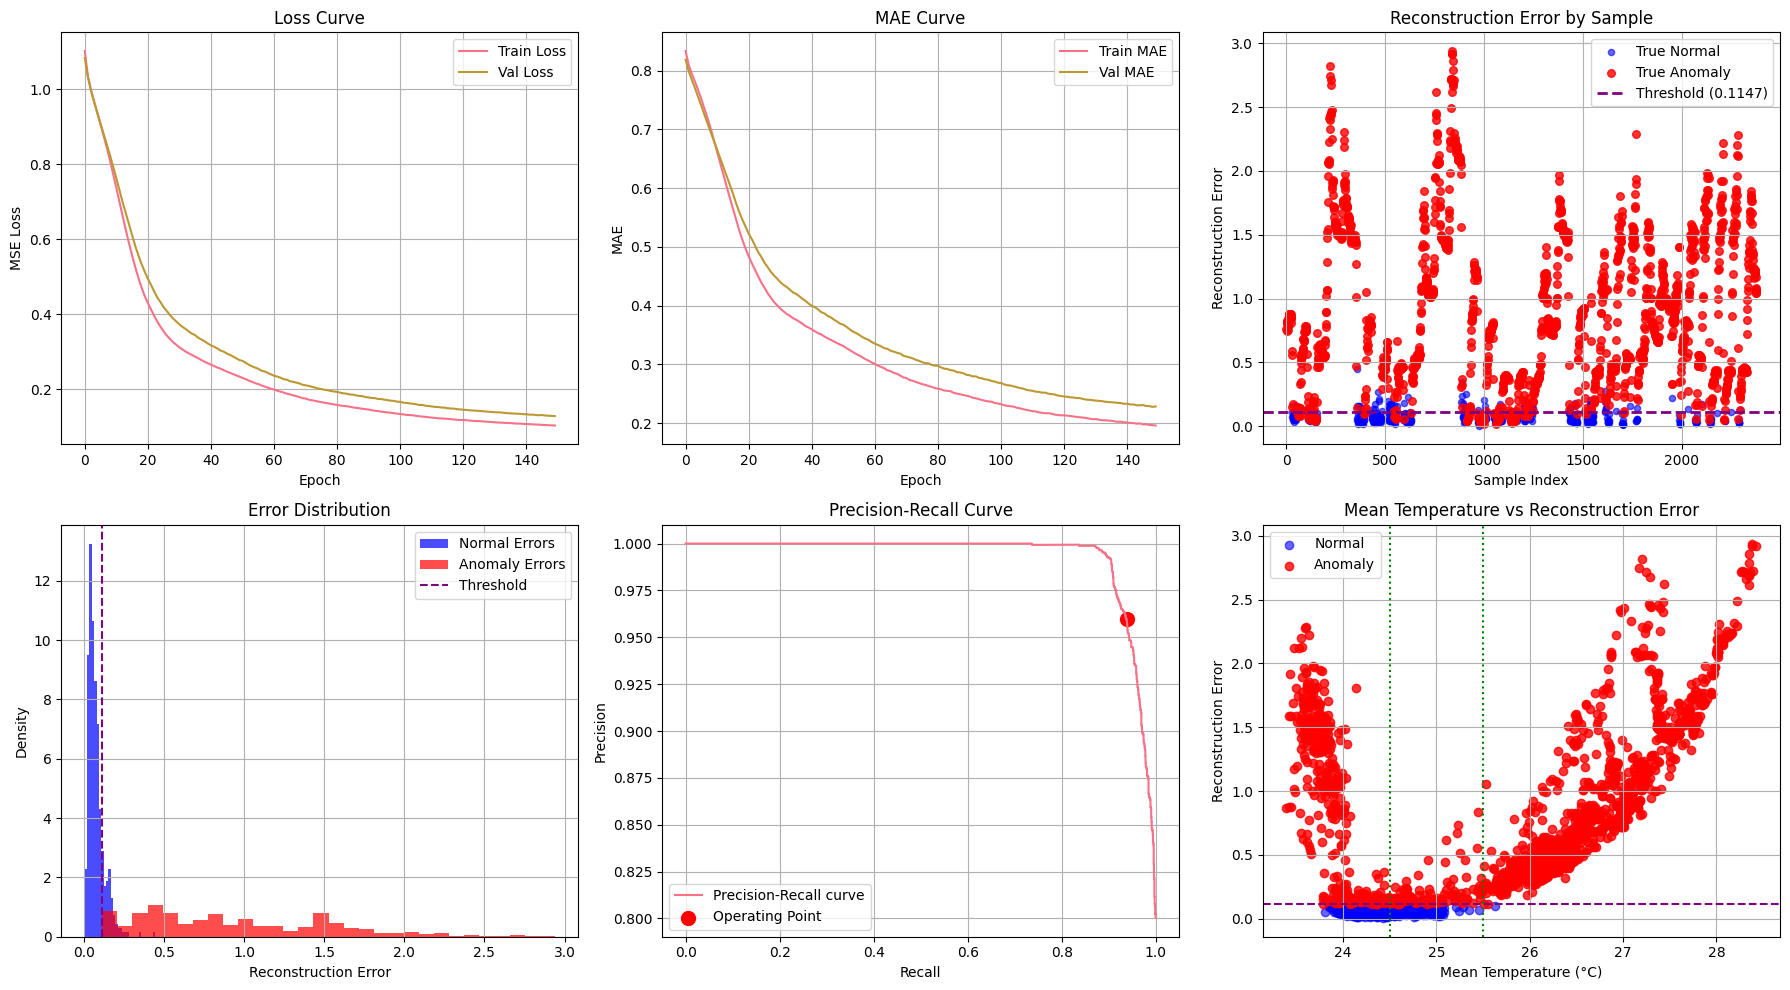

In [86]:
results = autoencoder_anomaly_detection(
    X_normal=data_splits['X_normal'],
    X_full=data_splits['X_full'],
    true_labels=data_splits['true_labels'],
    scaler=data_splits['scaler'],
    TEMP_MIN=TEMP_MIN,
    TEMP_MAX=TEMP_MAX,
    normal_indices=data_splits['normal_indices'],
    anomaly_indices=data_splits['anomaly_indices'],
    original_data=data_splits['original_data']
)


## results 

- Loss Curves: Both the Training and Validation Loss (for MSE and MAE) decrease steadily over the 150 epochs, indicating that the model is learning effectively without overfitting.

- Error Distribution: This graph clearly shows a separation between the reconstruction errors for normal data and anomalous data. The errors for normal data are clustered near zero, while the anomaly errors are more spread out, demonstrating the model's ability to distinguish between the two.

- Reconstruction Error by Sample: The blue dots representing "True Normal" data points have a very low reconstruction error, while the red dots for "True Anomaly" have a significantly higher error, mostly above the set threshold. This visually confirms the model's effectiveness in identifying anomalies.

- Precision-Recall Curve: The curve is high, which suggests that the model achieves a good balance of precision (low false positives) and recall (low false negatives). The operating point on the curve, with a recall of close to 1.0 and a precision of about 0.97, indicates a highly effective trade-off for anomaly detection..

- Mean Temperature vs. Reconstruction Error: This plot shows a clear distinction between the "Normal" and "Anomaly" data points. The reconstruction errors for anomalies are consistently higher than for normal data, highlighting the model's ability to identify unusual patterns.









In [92]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, Model, backend as K
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the latent vector."""
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class VAE(Model):
    """Variational Autoencoder Model"""
    def __init__(self, input_dim, latent_dim=2, intermediate_dim=64, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.intermediate_dim = intermediate_dim
        
        # Encoder layers
        self.encoder_dense1 = layers.Dense(intermediate_dim, activation='relu')
        self.z_mean_layer = layers.Dense(latent_dim)
        self.z_log_var_layer = layers.Dense(latent_dim)
        self.sampling_layer = Sampling()
        
        # Decoder layers
        self.decoder_dense1 = layers.Dense(intermediate_dim, activation='relu')
        self.decoder_output = layers.Dense(input_dim, activation='linear')
        
    def encode(self, x):
        h = self.encoder_dense1(x)
        z_mean = self.z_mean_layer(h)
        z_log_var = self.z_log_var_layer(h)
        z = self.sampling_layer([z_mean, z_log_var])
        return z_mean, z_log_var, z
    
    def decode(self, z):
        h = self.decoder_dense1(z)
        return self.decoder_output(h)
    
    def call(self, inputs, training=None):
        z_mean, z_log_var, z = self.encode(inputs)
        reconstructed = self.decode(z)
        
        # Add KL divergence loss
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=1)
        )
        self.add_loss(kl_loss)
        
        return reconstructed

def build_vae(input_dim, latent_dim=2, intermediate_dim=64):
    """Build and compile VAE model"""
    vae = VAE(input_dim, latent_dim, intermediate_dim)
    
    # Build the model by calling it with a dummy input
    dummy_input = tf.zeros((1, input_dim))
    _ = vae(dummy_input)
    
    vae.compile(optimizer='adam', loss='mse')
    
    return vae

def train_vae(vae, X_train, X_val=None, epochs=100, batch_size=32):
    """Train the VAE model"""
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss' if X_val is not None else 'loss', 
            patience=15, 
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss' if X_val is not None else 'loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6,
            verbose=1
        )
    ]
    
    validation_data = (X_val, X_val) if X_val is not None else None
    
    history = vae.fit(
        X_train, X_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=validation_data,
        callbacks=callbacks,
        verbose=1,
        shuffle=True
    )
    return history

def get_reconstruction_error(vae, X):
    """Calculate reconstruction errors for anomaly detection"""
    X_pred = vae.predict(X, verbose=0)
    errors = np.mean(np.square(X - X_pred), axis=1)
    return errors

def evaluate_anomaly_detection(errors, true_labels, plot_results=True):
    """Evaluate anomaly detection performance"""
    from sklearn.metrics import precision_recall_curve, roc_auc_score
    
    # Convert labels if needed (assuming 1=normal, 0=anomaly in true_labels)
    y_true_anomaly = (true_labels == 0).astype(int)
    
    # Find best threshold using precision-recall curve
    precisions, recalls, thresholds = precision_recall_curve(y_true_anomaly, errors)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else thresholds[-1]

    detected = errors > best_threshold

    precision = precision_score(y_true_anomaly, detected, zero_division=0)
    recall = recall_score(y_true_anomaly, detected, zero_division=0)
    f1 = f1_score(y_true_anomaly, detected, zero_division=0)
    cm = confusion_matrix(y_true_anomaly, detected)
    
    try:
        auc_score = roc_auc_score(y_true_anomaly, errors)
    except:
        auc_score = 0.0

    print(f"=== VAE ANOMALY DETECTION RESULTS ===")
    print(f"Best threshold: {best_threshold:.6f}")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")
    print(f"AUC Score: {auc_score:.3f}")
    print(f"Confusion Matrix:")
    print(f"  TN: {cm[0,0]}, FP: {cm[0,1]}")
    print(f"  FN: {cm[1,0]}, TP: {cm[1,1]}")
    
    if plot_results:
        plt.figure(figsize=(15, 5))
        
        # Plot 1: Error distribution
        plt.subplot(1, 3, 1)
        normal_errors = errors[true_labels == 1]
        anomaly_errors = errors[true_labels == 0]
        
        plt.hist(normal_errors, bins=30, alpha=0.7, label='Normal', color='blue', density=True)
        if len(anomaly_errors) > 0:
            plt.hist(anomaly_errors, bins=30, alpha=0.7, label='Anomaly', color='red', density=True)
        plt.axvline(best_threshold, color='purple', linestyle='--', label='Threshold')
        plt.xlabel('Reconstruction Error')
        plt.ylabel('Density')
        plt.title('VAE Error Distribution')
        plt.legend()
        plt.grid(True)
        
        # Plot 2: Precision-Recall curve
        plt.subplot(1, 3, 2)
        plt.plot(recalls, precisions, 'b-', linewidth=2)
        plt.scatter(recall, precision, color='red', s=100, label=f'Operating Point\n(F1={f1:.3f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('VAE Precision-Recall Curve')
        plt.legend()
        plt.grid(True)
        
        # Plot 3: Reconstruction errors over time
        plt.subplot(1, 3, 3)
        plt.plot(errors, alpha=0.7, color='gray', label='All Errors')
        detected_indices = np.where(detected)[0]
        plt.scatter(detected_indices, errors[detected_indices], 
                   c='red', s=30, label='Detected Anomalies', alpha=0.8)
        plt.axhline(best_threshold, color='purple', linestyle='--', label='Threshold')
        plt.xlabel('Sample Index')
        plt.ylabel('Reconstruction Error')
        plt.title('VAE Detection Results')
        plt.legend()
        plt.grid(True)
        
        plt.tight_layout()
        plt.show()

    return best_threshold, precision, recall, f1, cm, detected, auc_score

# Example usage function
def run_vae_anomaly_detection(data_splits, latent_dim=4, intermediate_dim=64, epochs=150):
    """Complete VAE anomaly detection pipeline"""
    X_normal = data_splits['X_normal']
    X_full = data_splits['X_full']
    true_labels = data_splits['true_labels']
    
    print("=== BUILDING VAE MODEL ===")
    input_dim = X_normal.shape[1]
    vae = build_vae(input_dim, latent_dim=latent_dim, intermediate_dim=intermediate_dim)
    
    print(f"Model built with {input_dim} input features")
    print(f"Latent dimension: {latent_dim}")
    print(f"Intermediate dimension: {intermediate_dim}")
    
    # Split normal data for training/validation
    from sklearn.model_selection import train_test_split
    if len(X_normal) > 50:
        X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)
    else:
        X_train = X_normal
        X_val = X_normal[:min(10, len(X_normal))]
    
    print(f"\nTraining set: {X_train.shape}")
    print(f"Validation set: {X_val.shape}")
    
    print("\n=== TRAINING VAE ===")
    history = train_vae(vae, X_train, X_val, epochs=epochs, batch_size=32)
    
    print("\n=== EVALUATING ON FULL DATASET ===")
    errors = get_reconstruction_error(vae, X_full)
    results = evaluate_anomaly_detection(errors, true_labels, plot_results=True)
    
    return vae, history, results

Starting VAE-based anomaly detection...
=== BUILDING VAE MODEL ===
Model built with 20 input features
Latent dimension: 4
Intermediate dimension: 64

Training set: (380, 20)
Validation set: (95, 20)

=== TRAINING VAE ===
Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.5002 - val_loss: 1.8092 - learning_rate: 0.0010
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 2.5002 - val_loss: 1.8092 - learning_rate: 0.0010
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6557 - val_loss: 1.4412 - learning_rate: 0.0010
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6557 - val_loss: 1.4412 - learning_rate: 0.0010
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3462 - val_loss: 1.3087 - learning_rate: 0.0010
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3462 - val_loss: 1.3087 - learning_rate: 0.0010
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2196 - val_loss: 1.2187 - learning_rate: 0.0010
Epoch 5/150
12

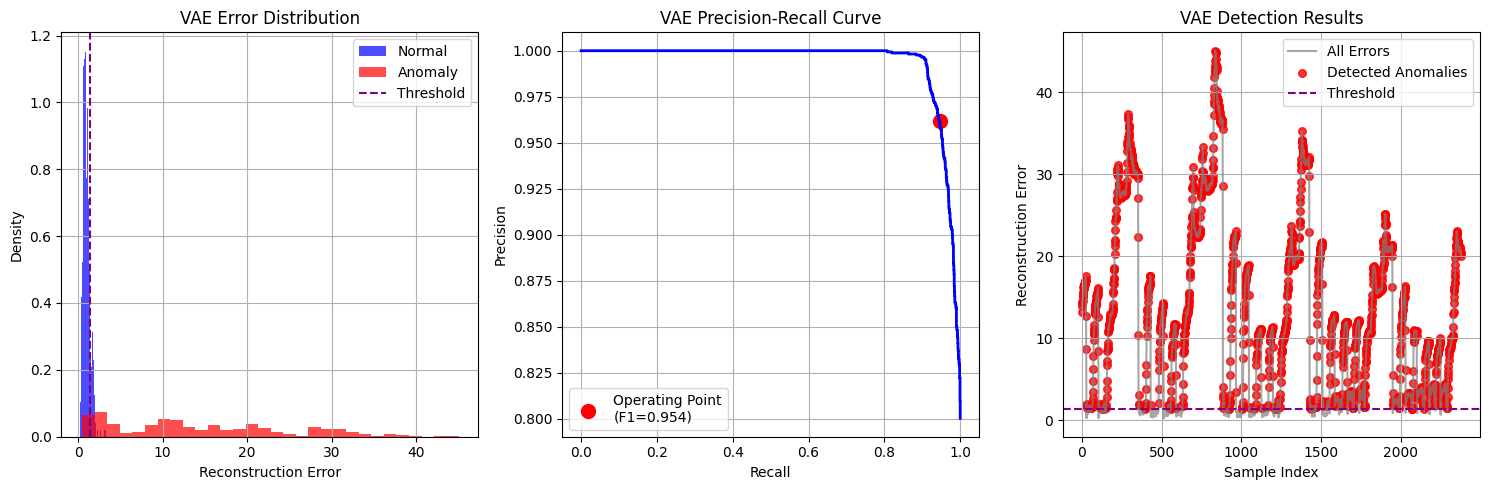

✅ VAE anomaly detection completed!
Final Performance: Precision=0.962, Recall=0.946, F1=0.954


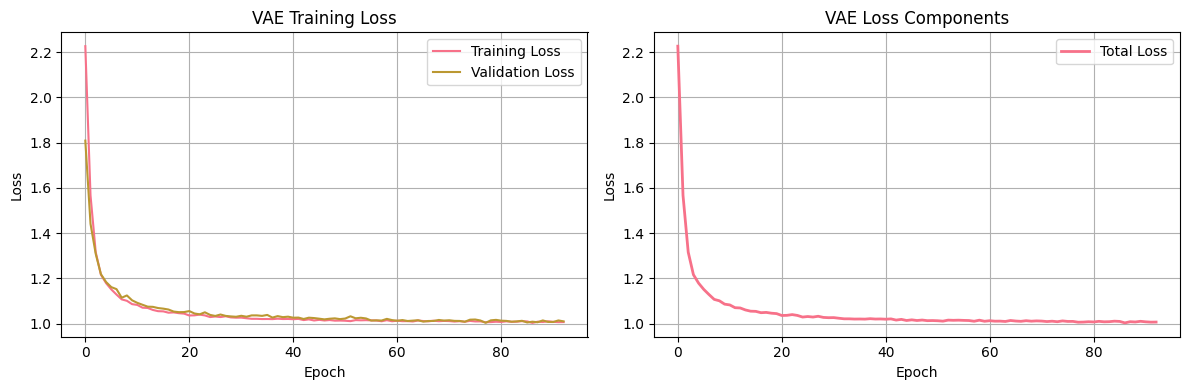

In [93]:
# Run VAE Anomaly Detection
print("Starting VAE-based anomaly detection...")

# Run the complete VAE pipeline
vae_model, vae_history, vae_results = run_vae_anomaly_detection(
    data_splits, 
    latent_dim=4, 
    intermediate_dim=64, 
    epochs=150
)

# Extract results
best_threshold, precision, recall, f1, cm, detected, auc_score = vae_results

# Store VAE results for comparison
vae_anomaly_results = {
    'model': vae_model,
    'threshold': best_threshold,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'auc_score': auc_score,
    'confusion_matrix': cm,
    'detected_anomalies': detected,
    'history': vae_history
}

print("✅ VAE anomaly detection completed!")
print(f"Final Performance: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")

# Show training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(vae_history.history['loss'], label='Training Loss')
if 'val_loss' in vae_history.history:
    plt.plot(vae_history.history['val_loss'], label='Validation Loss')
plt.title('VAE Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
# Plot loss components if available
total_loss = vae_history.history['loss']
plt.plot(total_loss, label='Total Loss', linewidth=2)
plt.title('VAE Loss Components')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [96]:
# Autoencoder + Bayesian Fusion Model for Enhanced Anomaly Detection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

try:
    from pgmpy.models import DiscreteBayesianNetwork
    from pgmpy.factors.discrete import TabularCPD
    from pgmpy.inference import VariableElimination
    from pgmpy.estimators import MaximumLikelihoodEstimator
    print("✅ pgmpy with DiscreteBayesianNetwork imported successfully")
except ImportError:
    try:
        from pgmpy.models import BayesianNetwork as DiscreteBayesianNetwork
        from pgmpy.factors.discrete import TabularCPD
        from pgmpy.inference import VariableElimination
        from pgmpy.estimators import MaximumLikelihoodEstimator
        print("✅ pgmpy with BayesianNetwork imported successfully")
    except ImportError:
        print("❌ pgmpy not available, Bayesian component will be disabled")
        DiscreteBayesianNetwork = None

class AutoencoderBayesianFusion:
    """
    Combined Autoencoder + Bayesian Network model for anomaly detection.
    
    The autoencoder learns reconstruction patterns from normal data,
    while the Bayesian network models probabilistic relationships between
    features and anomaly indicators.
    """
    
    def __init__(self, input_dim, latent_dim=4, intermediate_dim=64, 
                 temp_min=24.5, temp_max=25.5, n_bins=5):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.intermediate_dim = intermediate_dim
        self.temp_min = temp_min
        self.temp_max = temp_max
        self.n_bins = n_bins
        
        # Initialize components
        self.autoencoder = None
        self.bayesian_net = None
        self.scaler = StandardScaler()
        self.is_trained = False
        
        # Thresholds and parameters
        self.ae_threshold = None
        self.feature_bins = {}
        
    def _build_autoencoder(self):
        """Build the autoencoder component"""
        input_layer = keras.Input(shape=(self.input_dim,))
        
        # Encoder
        encoded = layers.Dense(self.intermediate_dim, activation='relu',
                              kernel_regularizer=keras.regularizers.l2(0.001))(input_layer)
        encoded = layers.Dropout(0.2)(encoded)
        encoded = layers.Dense(self.latent_dim, activation='relu',
                              kernel_regularizer=keras.regularizers.l2(0.001))(encoded)
        
        # Decoder
        decoded = layers.Dense(self.intermediate_dim, activation='relu',
                              kernel_regularizer=keras.regularizers.l2(0.001))(encoded)
        decoded = layers.Dropout(0.2)(decoded)
        decoded = layers.Dense(self.input_dim, activation='linear')(decoded)
        
        autoencoder = keras.Model(input_layer, decoded, name='autoencoder')
        autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])
        
        return autoencoder
    
    def _discretize_features(self, X, fit=False):
        """Convert continuous features to discrete bins for Bayesian network"""
        X_discrete = np.zeros_like(X, dtype=int)
        
        for i in range(X.shape[1]):
            feature_data = X[:, i]
            
            if fit:
                # Create bins based on quantiles for better distribution
                try:
                    _, bin_edges = pd.qcut(feature_data, q=self.n_bins, retbins=True, duplicates='drop')
                    self.feature_bins[f'feature_{i}'] = bin_edges
                except ValueError:
                    # Fallback to uniform bins if quantiles fail
                    bin_edges = np.linspace(feature_data.min(), feature_data.max(), self.n_bins + 1)
                    self.feature_bins[f'feature_{i}'] = bin_edges
            else:
                bin_edges = self.feature_bins[f'feature_{i}']
            
            # Discretize the feature
            X_discrete[:, i] = np.digitize(feature_data, bin_edges) - 1
            # Ensure values are within valid range
            X_discrete[:, i] = np.clip(X_discrete[:, i], 0, self.n_bins - 1)
            
        return X_discrete
    
    def _create_temperature_features(self, X):
        """Create temperature-related features for Bayesian network"""
        # Mean temperature across sensors
        mean_temp = np.mean(X, axis=1)
        
        # Temperature variance (instability indicator)
        temp_var = np.var(X, axis=1)
        
        # Temperature range
        temp_range = np.max(X, axis=1) - np.min(X, axis=1)
        
        # Compliance with temperature specs
        compliance = np.mean((X >= self.temp_min) & (X <= self.temp_max), axis=1)
        
        return np.column_stack([mean_temp, temp_var, temp_range, compliance])
    
    def _build_bayesian_network(self, X_discrete, ae_errors, temp_features):
        """Build Bayesian network with autoencoder errors and temperature features"""
        if DiscreteBayesianNetwork is None:
            print("⚠️ Bayesian network not available, skipping this component")
            return None
            
        try:
            # Create discrete versions of derived features
            ae_error_discrete = np.digitize(ae_errors, 
                                          np.quantile(ae_errors, np.linspace(0, 1, self.n_bins + 1))) - 1
            ae_error_discrete = np.clip(ae_error_discrete, 0, self.n_bins - 1)
            
            # Discretize temperature features
            temp_discrete = np.zeros((len(temp_features), 4), dtype=int)
            for i in range(4):
                temp_discrete[:, i] = np.digitize(temp_features[:, i],
                                                np.quantile(temp_features[:, i], 
                                                          np.linspace(0, 1, self.n_bins + 1))) - 1
                temp_discrete[:, i] = np.clip(temp_discrete[:, i], 0, self.n_bins - 1)
            
            # Define network structure
            # AE_Error -> Anomaly <- Temp_Mean, Temp_Var, Temp_Range, Compliance
            model = DiscreteBayesianNetwork([
                ('AE_Error', 'Anomaly'),
                ('Temp_Mean', 'Anomaly'),
                ('Temp_Var', 'Anomaly'),
                ('Temp_Range', 'Anomaly'),
                ('Compliance', 'Anomaly')
            ])
            
            # Prepare data for learning
            data_df = pd.DataFrame({
                'AE_Error': ae_error_discrete,
                'Temp_Mean': temp_discrete[:, 0],
                'Temp_Var': temp_discrete[:, 1],
                'Temp_Range': temp_discrete[:, 2],
                'Compliance': temp_discrete[:, 3],
                'Anomaly': (ae_errors > np.percentile(ae_errors, 80)).astype(int)  # Top 20% as anomalies
            })
            
            # Learn parameters
            model.fit(data_df, estimator=MaximumLikelihoodEstimator)
            
            print("✅ Bayesian network built successfully")
            return model
            
        except Exception as e:
            print(f"⚠️ Error building Bayesian network: {e}")
            return None
    
    def fit(self, X_normal, X_full=None, epochs=100, batch_size=32, verbose=1):
        """
        Train the combined model on normal data
        
        Parameters:
        -----------
        X_normal : array-like
            Normal data for training autoencoder
        X_full : array-like, optional
            Full dataset for Bayesian network training
        """
        print("=== TRAINING AUTOENCODER + BAYESIAN FUSION MODEL ===")
        
        # Scale the data
        X_normal_scaled = self.scaler.fit_transform(X_normal)
        
        # Build and train autoencoder
        print("Building autoencoder...")
        self.autoencoder = self._build_autoencoder()
        
        # Train autoencoder
        print("Training autoencoder on normal data...")
        history = self.autoencoder.fit(
            X_normal_scaled, X_normal_scaled,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=[
                keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
                keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
            ],
            verbose=verbose
        )
        
        # Set autoencoder threshold based on normal data (calculate directly to avoid is_trained check)
        X_normal_pred = self.autoencoder.predict(X_normal_scaled, verbose=0)
        normal_errors = np.mean(np.square(X_normal_scaled - X_normal_pred), axis=1)
        self.ae_threshold = np.percentile(normal_errors, 95)
        
        # Mark autoencoder as trained
        self.is_trained = True
        
        # Build Bayesian network if full dataset is provided
        if X_full is not None:
            print("Building Bayesian network...")
            X_full_scaled = self.scaler.transform(X_full)
            
            # Get autoencoder errors for full dataset
            full_errors = np.mean(np.square(X_full_scaled - self.autoencoder.predict(X_full_scaled, verbose=0)), axis=1)
            
            # Create temperature features
            temp_features = self._create_temperature_features(X_full)
            
            # Discretize features for Bayesian network
            X_full_discrete = self._discretize_features(X_full_scaled, fit=True)
            
            # Build Bayesian network
            self.bayesian_net = self._build_bayesian_network(X_full_discrete, full_errors, temp_features)
        print("✅ Combined model training completed!")
        
        return history
    
    def predict_ae_errors(self, X):
        """Predict autoencoder reconstruction errors"""
        if not self.is_trained:
            raise ValueError("Model must be trained first")
            
        X_scaled = self.scaler.transform(X)
        X_pred = self.autoencoder.predict(X_scaled, verbose=0)
        errors = np.mean(np.square(X_scaled - X_pred), axis=1)
        return errors
    
    def predict_bayesian_anomaly_prob(self, X):
        """Predict anomaly probability using Bayesian network"""
        if self.bayesian_net is None:
            return np.zeros(len(X))  # Return zero probabilities if no Bayesian network
            
        try:
            X_scaled = self.scaler.transform(X)
            
            # Get autoencoder errors
            ae_errors = self.predict_ae_errors(X)
            
            # Create temperature features
            temp_features = self._create_temperature_features(X)
            
            # Discretize features
            X_discrete = self._discretize_features(X_scaled, fit=False)
            ae_error_discrete = np.digitize(ae_errors, 
                                          np.quantile(ae_errors, np.linspace(0, 1, self.n_bins + 1))) - 1
            ae_error_discrete = np.clip(ae_error_discrete, 0, self.n_bins - 1)
            
            temp_discrete = np.zeros((len(temp_features), 4), dtype=int)
            for i in range(4):
                temp_discrete[:, i] = np.digitize(temp_features[:, i],
                                                np.quantile(temp_features[:, i], 
                                                          np.linspace(0, 1, self.n_bins + 1))) - 1
                temp_discrete[:, i] = np.clip(temp_discrete[:, i], 0, self.n_bins - 1)
            
            # Inference
            inference = VariableElimination(self.bayesian_net)
            anomaly_probs = []
            
            for i in range(len(X)):
                try:
                    evidence = {
                        'AE_Error': int(ae_error_discrete[i]),
                        'Temp_Mean': int(temp_discrete[i, 0]),
                        'Temp_Var': int(temp_discrete[i, 1]),
                        'Temp_Range': int(temp_discrete[i, 2]),
                        'Compliance': int(temp_discrete[i, 3])
                    }
                    
                    result = inference.query(['Anomaly'], evidence=evidence)
                    prob_anomaly = result.values[1]  # Probability of anomaly=1
                    anomaly_probs.append(prob_anomaly)
                    
                except Exception:
                    anomaly_probs.append(0.5)  # Default probability if inference fails
            
            return np.array(anomaly_probs)
            
        except Exception as e:
            print(f"Warning: Bayesian prediction failed: {e}")
            return np.zeros(len(X))
    
    def predict_combined(self, X, ae_weight=0.6, bayesian_weight=0.4):
        """
        Predict anomalies using combined autoencoder and Bayesian approach
        
        Parameters:
        -----------
        X : array-like
            Input data
        ae_weight : float
            Weight for autoencoder component
        bayesian_weight : float
            Weight for Bayesian component
        """
        if not self.is_trained:
            raise ValueError("Model must be trained first")
        
        # Get autoencoder errors
        ae_errors = self.predict_ae_errors(X)
        ae_scores = (ae_errors - ae_errors.min()) / (ae_errors.max() - ae_errors.min())
        
        # Get Bayesian probabilities
        bayesian_probs = self.predict_bayesian_anomaly_prob(X)
        
        # Combine scores
        combined_scores = ae_weight * ae_scores + bayesian_weight * bayesian_probs
        
        return {
            'ae_errors': ae_errors,
            'ae_scores': ae_scores,
            'bayesian_probs': bayesian_probs,
            'combined_scores': combined_scores,
            'ae_anomalies': ae_errors > self.ae_threshold,
            'bayesian_anomalies': bayesian_probs > 0.5,
            'combined_anomalies': combined_scores > np.percentile(combined_scores, 80)
        }
    
    def evaluate(self, X, true_labels, ae_weight=0.6, bayesian_weight=0.4):
        """Evaluate the combined model"""
        results = self.predict_combined(X, ae_weight, bayesian_weight)
        
        # Convert labels (1=normal, 0=anomaly -> 1=anomaly, 0=normal for metrics)
        y_true = (true_labels == 0).astype(int)
        
        # Evaluate each component
        evaluations = {}
        
        for method in ['ae_anomalies', 'bayesian_anomalies', 'combined_anomalies']:
            y_pred = results[method].astype(int)
            
            precision = precision_score(y_true, y_pred, zero_division=0)
            recall = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)
            cm = confusion_matrix(y_true, y_pred)
            
            evaluations[method] = {
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'confusion_matrix': cm
            }
        
        return evaluations, results

def run_autoencoder_bayesian_fusion(data_splits, temp_min=24.5, temp_max=25.5, 
                                   ae_weight=0.6, bayesian_weight=0.4, epochs=100):
    """Complete pipeline for Autoencoder + Bayesian Fusion model"""
    
    X_normal = data_splits['X_normal']
    X_full = data_splits['X_full']
    true_labels = data_splits['true_labels']
    
    print(f"Training combined model with {X_normal.shape[1]} features")
    print(f"Normal samples: {len(X_normal)}, Total samples: {len(X_full)}")
    
    # Initialize and train model
    model = AutoencoderBayesianFusion(
        input_dim=X_normal.shape[1],
        latent_dim=max(2, X_normal.shape[1] // 2),
        intermediate_dim=max(8, X_normal.shape[1]),
        temp_min=temp_min,
        temp_max=temp_max
    )
    
    # Train on normal data, use full data for Bayesian network
    history = model.fit(X_normal, X_full, epochs=epochs, verbose=1)
    
    # Evaluate on full dataset
    evaluations, results = model.evaluate(X_full, true_labels, ae_weight, bayesian_weight)
    
    # Print results
    print("\n=== COMBINED MODEL EVALUATION ===")
    for method, metrics in evaluations.items():
        method_name = method.replace('_', ' ').title()
        print(f"\n{method_name}:")
        print(f"  Precision: {metrics['precision']:.3f}")
        print(f"  Recall: {metrics['recall']:.3f}")
        print(f"  F1-Score: {metrics['f1_score']:.3f}")
    
    # Visualization
    plt.figure(figsize=(20, 12))
    
    # Plot 1: Training history
    plt.subplot(3, 4, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Autoencoder Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Score distributions
    plt.subplot(3, 4, 2)
    normal_mask = true_labels == 1
    anomaly_mask = true_labels == 0
    
    plt.hist(results['ae_scores'][normal_mask], bins=30, alpha=0.7, label='Normal', color='blue', density=True)
    if np.sum(anomaly_mask) > 0:
        plt.hist(results['ae_scores'][anomaly_mask], bins=30, alpha=0.7, label='Anomaly', color='red', density=True)
    plt.title('Autoencoder Scores')
    plt.xlabel('Normalized AE Error')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # Plot 3: Bayesian probabilities
    plt.subplot(3, 4, 3)
    plt.hist(results['bayesian_probs'][normal_mask], bins=30, alpha=0.7, label='Normal', color='blue', density=True)
    if np.sum(anomaly_mask) > 0:
        plt.hist(results['bayesian_probs'][anomaly_mask], bins=30, alpha=0.7, label='Anomaly', color='red', density=True)
    plt.title('Bayesian Probabilities')
    plt.xlabel('Anomaly Probability')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # Plot 4: Combined scores
    plt.subplot(3, 4, 4)
    plt.hist(results['combined_scores'][normal_mask], bins=30, alpha=0.7, label='Normal', color='blue', density=True)
    if np.sum(anomaly_mask) > 0:
        plt.hist(results['combined_scores'][anomaly_mask], bins=30, alpha=0.7, label='Anomaly', color='red', density=True)
    plt.title('Combined Scores')
    plt.xlabel('Combined Score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    
    # Plot 5-7: Time series of each method
    methods = ['ae_scores', 'bayesian_probs', 'combined_scores']
    titles = ['Autoencoder Scores Over Time', 'Bayesian Probabilities Over Time', 'Combined Scores Over Time']
    
    for i, (method, title) in enumerate(zip(methods, titles)):
        plt.subplot(3, 4, 5 + i)
        plt.plot(results[method], alpha=0.7, color='gray', linewidth=1)
        
        # Highlight detected anomalies
        anomaly_method = method.replace('_scores', '_anomalies').replace('_probs', '_anomalies')
        detected_indices = np.where(results[anomaly_method])[0]
        plt.scatter(detected_indices, results[method][detected_indices], 
                   c='red', s=20, alpha=0.8, label='Detected')
        
        plt.title(title)
        plt.xlabel('Sample Index')
        plt.ylabel('Score/Probability')
        plt.legend()
        plt.grid(True)
    
    # Plot 8: Performance comparison
    plt.subplot(3, 4, 8)
    methods = ['ae_anomalies', 'bayesian_anomalies', 'combined_anomalies']
    method_names = ['Autoencoder', 'Bayesian', 'Combined']
    f1_scores = [evaluations[method]['f1_score'] for method in methods]
    precisions = [evaluations[method]['precision'] for method in methods]
    recalls = [evaluations[method]['recall'] for method in methods]
    
    x = np.arange(len(method_names))
    width = 0.25
    
    plt.bar(x - width, precisions, width, label='Precision', alpha=0.8)
    plt.bar(x, recalls, width, label='Recall', alpha=0.8)
    plt.bar(x + width, f1_scores, width, label='F1-Score', alpha=0.8)
    
    plt.xlabel('Method')
    plt.ylabel('Score')
    plt.title('Performance Comparison')
    plt.xticks(x, method_names)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 9: Temperature correlation
    plt.subplot(3, 4, 9)
    original_data = data_splits['original_data']
    mean_temps = original_data.mean(axis=1)
    
    plt.scatter(mean_temps[~results['combined_anomalies']], results['combined_scores'][~results['combined_anomalies']], 
               c='blue', alpha=0.6, label='Normal', s=20)
    plt.scatter(mean_temps[results['combined_anomalies']], results['combined_scores'][results['combined_anomalies']], 
               c='red', alpha=0.8, label='Combined Anomalies', s=30)
    plt.axvline(temp_min, color='green', linestyle=':', label='Temp Range')
    plt.axvline(temp_max, color='green', linestyle=':')
    plt.xlabel('Mean Temperature (°C)')
    plt.ylabel('Combined Score')
    plt.title('Temperature vs Combined Score')
    plt.legend()
    plt.grid(True)
    
    # Plot 10: Method agreement
    plt.subplot(3, 4, 10)
    ae_detected = results['ae_anomalies']
    bayesian_detected = results['bayesian_anomalies']
    combined_detected = results['combined_anomalies']
    
    agreement_data = np.zeros(len(X_full))
    agreement_data[ae_detected & ~bayesian_detected] = 1  # Only AE
    agreement_data[~ae_detected & bayesian_detected] = 2  # Only Bayesian
    agreement_data[ae_detected & bayesian_detected] = 3   # Both
    
    colors = ['blue', 'orange', 'green', 'red']
    labels = ['Neither', 'Only AE', 'Only Bayesian', 'Both']
    
    for i, (color, label) in enumerate(zip(colors, labels)):
        mask = agreement_data == i
        if np.sum(mask) > 0:
            plt.scatter(np.where(mask)[0], np.ones(np.sum(mask)) * i, 
                       c=color, label=f'{label} ({np.sum(mask)})', alpha=0.7, s=20)
    
    plt.yticks([0, 1, 2, 3], labels)
    plt.xlabel('Sample Index')
    plt.title('Method Agreement')
    plt.legend()
    plt.grid(True)
    
    # Plot 11-12: Confusion matrices
    for i, (method, method_name) in enumerate([('combined_anomalies', 'Combined Model'), ('ae_anomalies', 'Autoencoder Only')]):
        plt.subplot(3, 4, 11 + i)
        cm = evaluations[method]['confusion_matrix']
        
        plt.imshow(cm, interpolation='nearest', cmap='Blues')
        plt.title(f'{method_name} Confusion Matrix')
        plt.colorbar()
        
        thresh = cm.max() / 2.
        for i_cm, j_cm in np.ndindex(cm.shape):
            plt.text(j_cm, i_cm, format(cm[i_cm, j_cm], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i_cm, j_cm] > thresh else "black")
        
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.xticks([0, 1], ['Normal', 'Anomaly'])
        plt.yticks([0, 1], ['Normal', 'Anomaly'])
    
    plt.tight_layout()
    plt.show()
    
    return model, evaluations, results

print("Use run_autoencoder_bayesian_fusion(data_splits) to train and evaluate the combined model.")

✅ pgmpy with DiscreteBayesianNetwork imported successfully
Use run_autoencoder_bayesian_fusion(data_splits) to train and evaluate the combined model.


Starting Autoencoder + Bayesian Fusion anomaly detection...

=== TESTING DIFFERENT WEIGHT COMBINATIONS ===

Testing weights: AE=0.7, Bayesian=0.3
Training combined model with 20 features
Normal samples: 475, Total samples: 2378
=== TRAINING AUTOENCODER + BAYESIAN FUSION MODEL ===
Building autoencoder...
Training autoencoder on normal data...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.0665 - mae: 0.8074 - val_loss: 1.2718 - val_mae: 0.8900 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.0665 - mae: 0.8074 - val_loss: 1.2718 - val_mae: 0.8900 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9988 - mae: 0.7856 - val_loss: 1.2025 - val_mae: 0.8657 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9988 - mae: 0.7856 - val_loss: 1.2025 - val_mae: 0.8657 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9814 - mae: 0.7745 - val_loss

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AE_Error': 'N', 'Temp_Mean': 'N', 'Temp_Var': 'N', 'Temp_Range': 'N', 'Compliance': 'N', 'Anomaly': 'N'}


✅ Bayesian network built successfully
✅ Combined model training completed!

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.986
  Recall: 0.921
  F1-Score: 0.952

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.986
  Recall: 0.921
  F1-Score: 0.952

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400


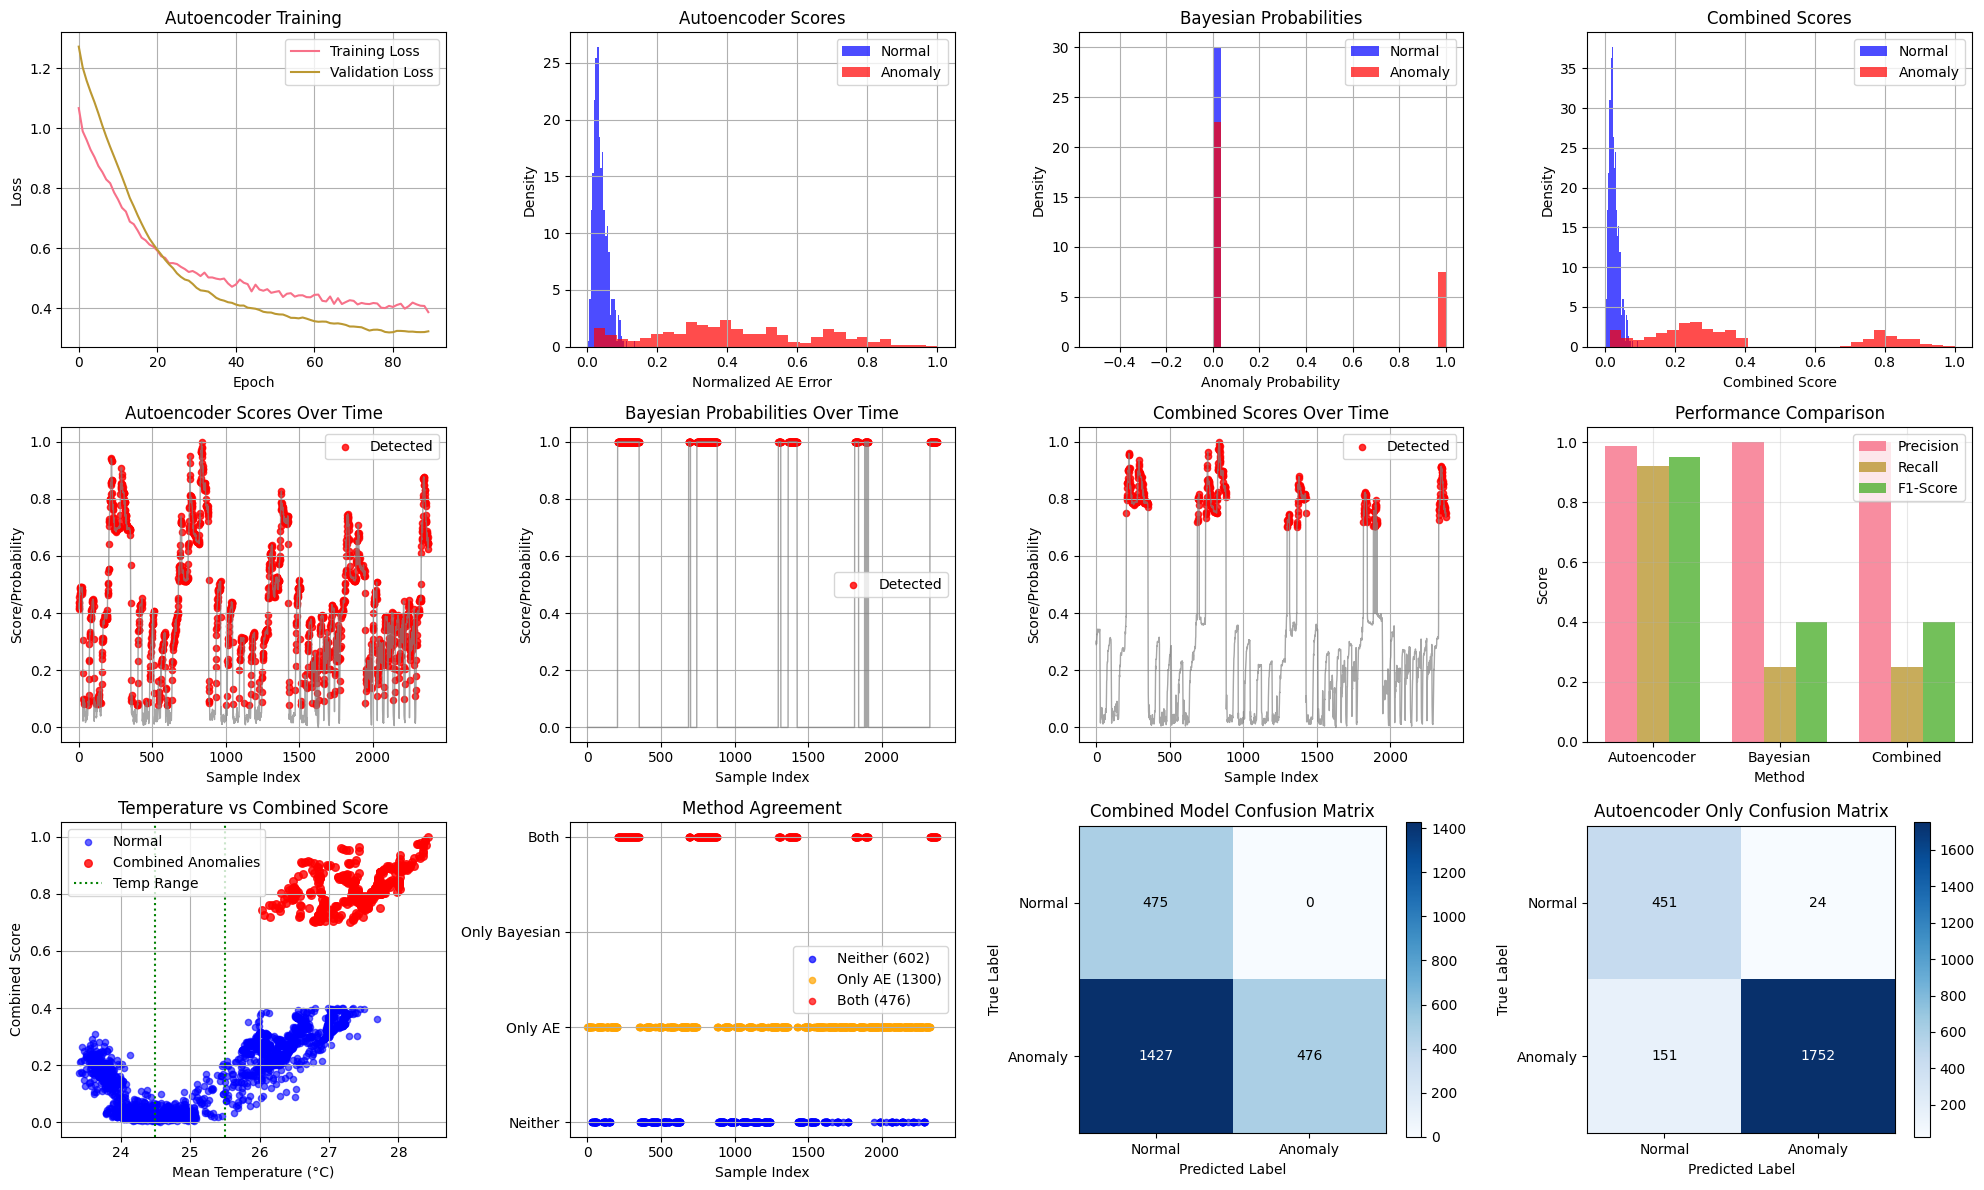

Combined F1-Score: 0.400

Testing weights: AE=0.6, Bayesian=0.4
Training combined model with 20 features
Normal samples: 475, Total samples: 2378
=== TRAINING AUTOENCODER + BAYESIAN FUSION MODEL ===
Building autoencoder...
Training autoencoder on normal data...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.2237 - mae: 0.8635 - val_loss: 1.3127 - val_mae: 0.8983 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.2237 - mae: 0.8635 - val_loss: 1.3127 - val_mae: 0.8983 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0653 - mae: 0.8132 - val_loss: 1.2525 - val_mae: 0.8809 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0653 - mae: 0.8132 - val_loss: 1.2525 - val_mae: 0.8809 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0246 - mae: 0.7981 - val_loss: 1.2219 - val_mae: 0.8720 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AE_Error': 'N', 'Temp_Mean': 'N', 'Temp_Var': 'N', 'Temp_Range': 'N', 'Compliance': 'N', 'Anomaly': 'N'}


✅ Bayesian network built successfully
✅ Combined model training completed!

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.987
  Recall: 0.924
  F1-Score: 0.954

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.987
  Recall: 0.924
  F1-Score: 0.954

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400


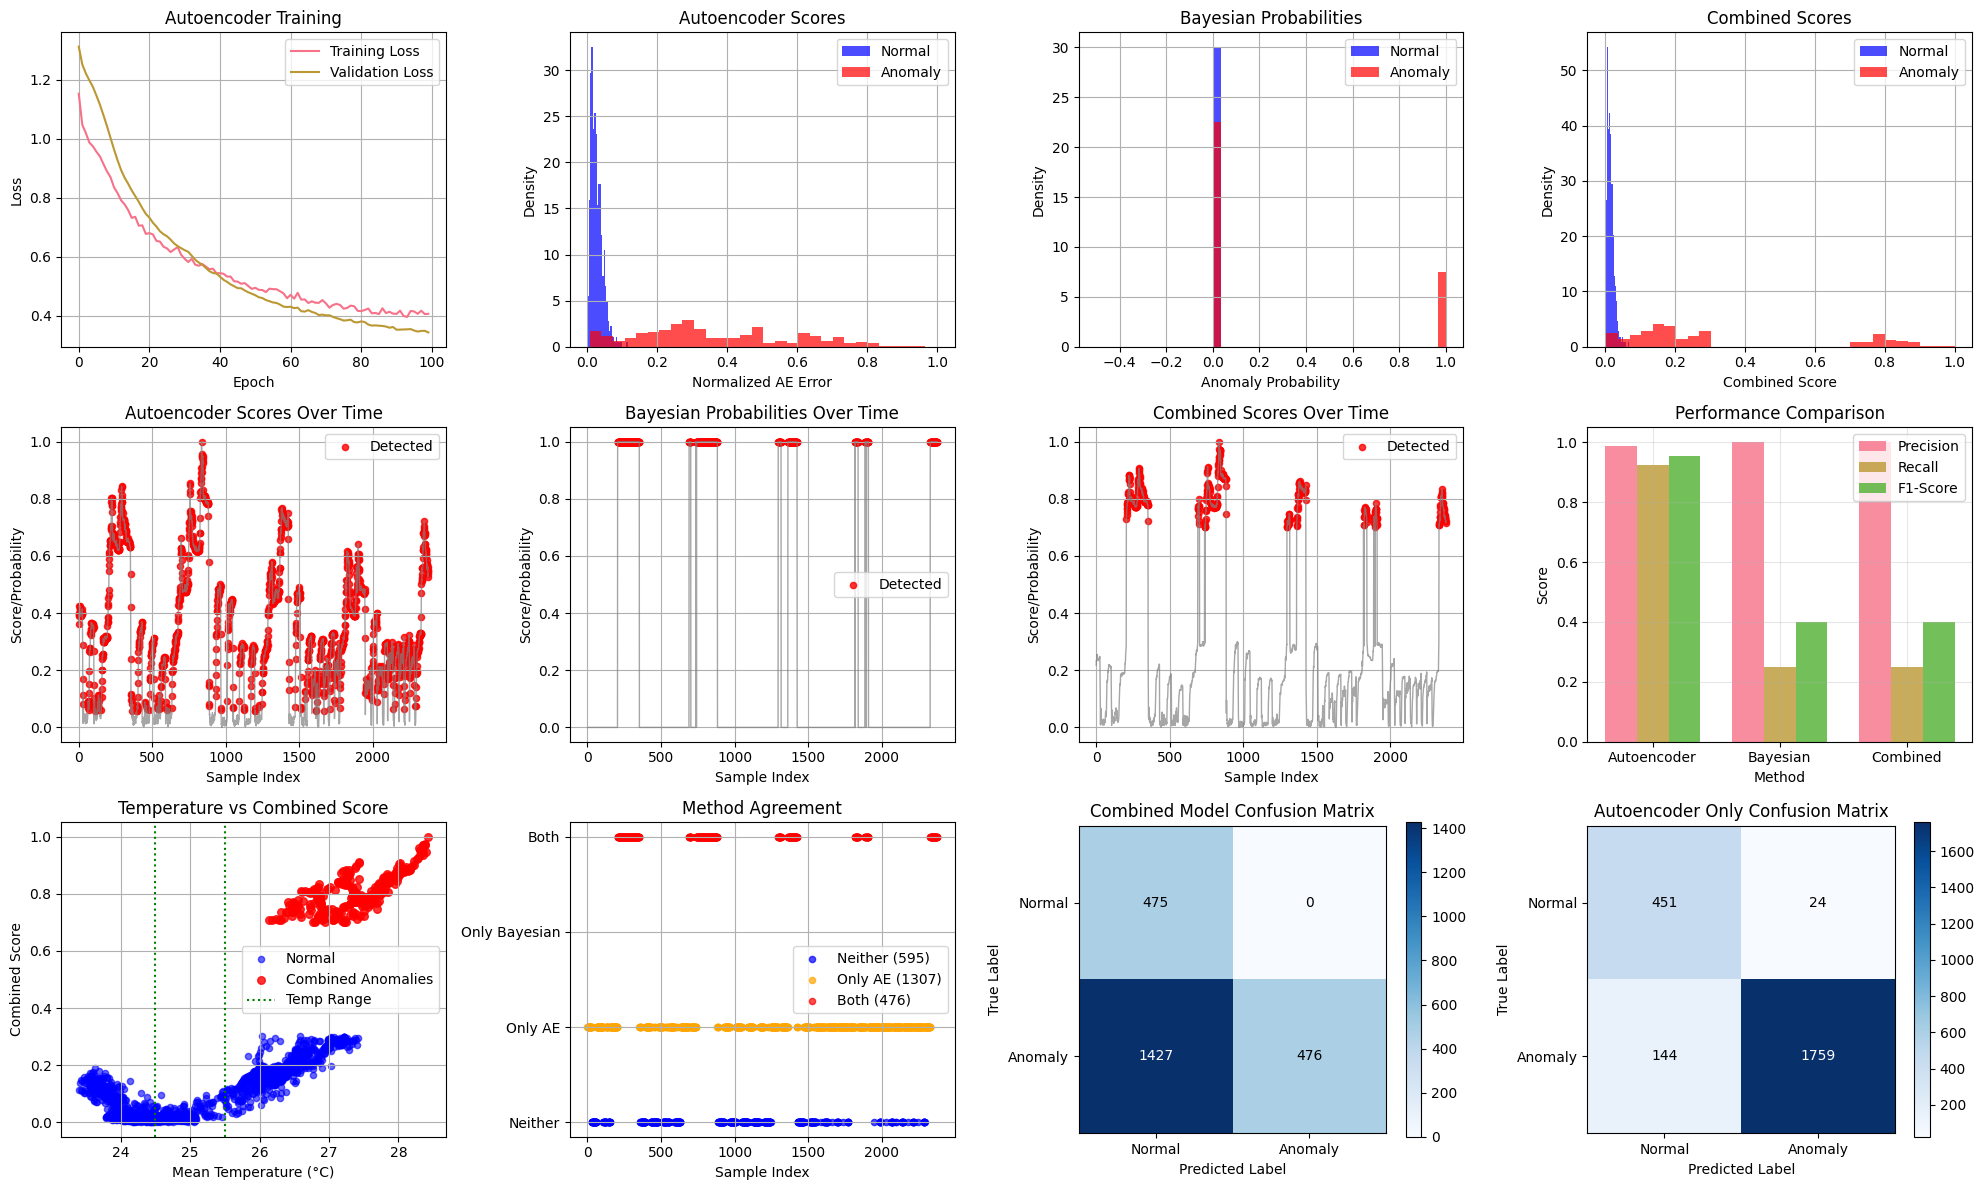

Combined F1-Score: 0.400

Testing weights: AE=0.5, Bayesian=0.5
Training combined model with 20 features
Normal samples: 475, Total samples: 2378
=== TRAINING AUTOENCODER + BAYESIAN FUSION MODEL ===
Building autoencoder...
Training autoencoder on normal data...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.1745 - mae: 0.8490 - val_loss: 1.3161 - val_mae: 0.9027 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.1745 - mae: 0.8490 - val_loss: 1.3161 - val_mae: 0.9027 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0602 - mae: 0.8089 - val_loss: 1.2657 - val_mae: 0.8867 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0602 - mae: 0.8089 - val_loss: 1.2657 - val_mae: 0.8867 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0101 - mae: 0.7893 - val_loss: 1.2387 - val_mae: 0.8785 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AE_Error': 'N', 'Temp_Mean': 'N', 'Temp_Var': 'N', 'Temp_Range': 'N', 'Compliance': 'N', 'Anomaly': 'N'}


✅ Bayesian network built successfully
✅ Combined model training completed!

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.986
  Recall: 0.915
  F1-Score: 0.949

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.986
  Recall: 0.915
  F1-Score: 0.949

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400


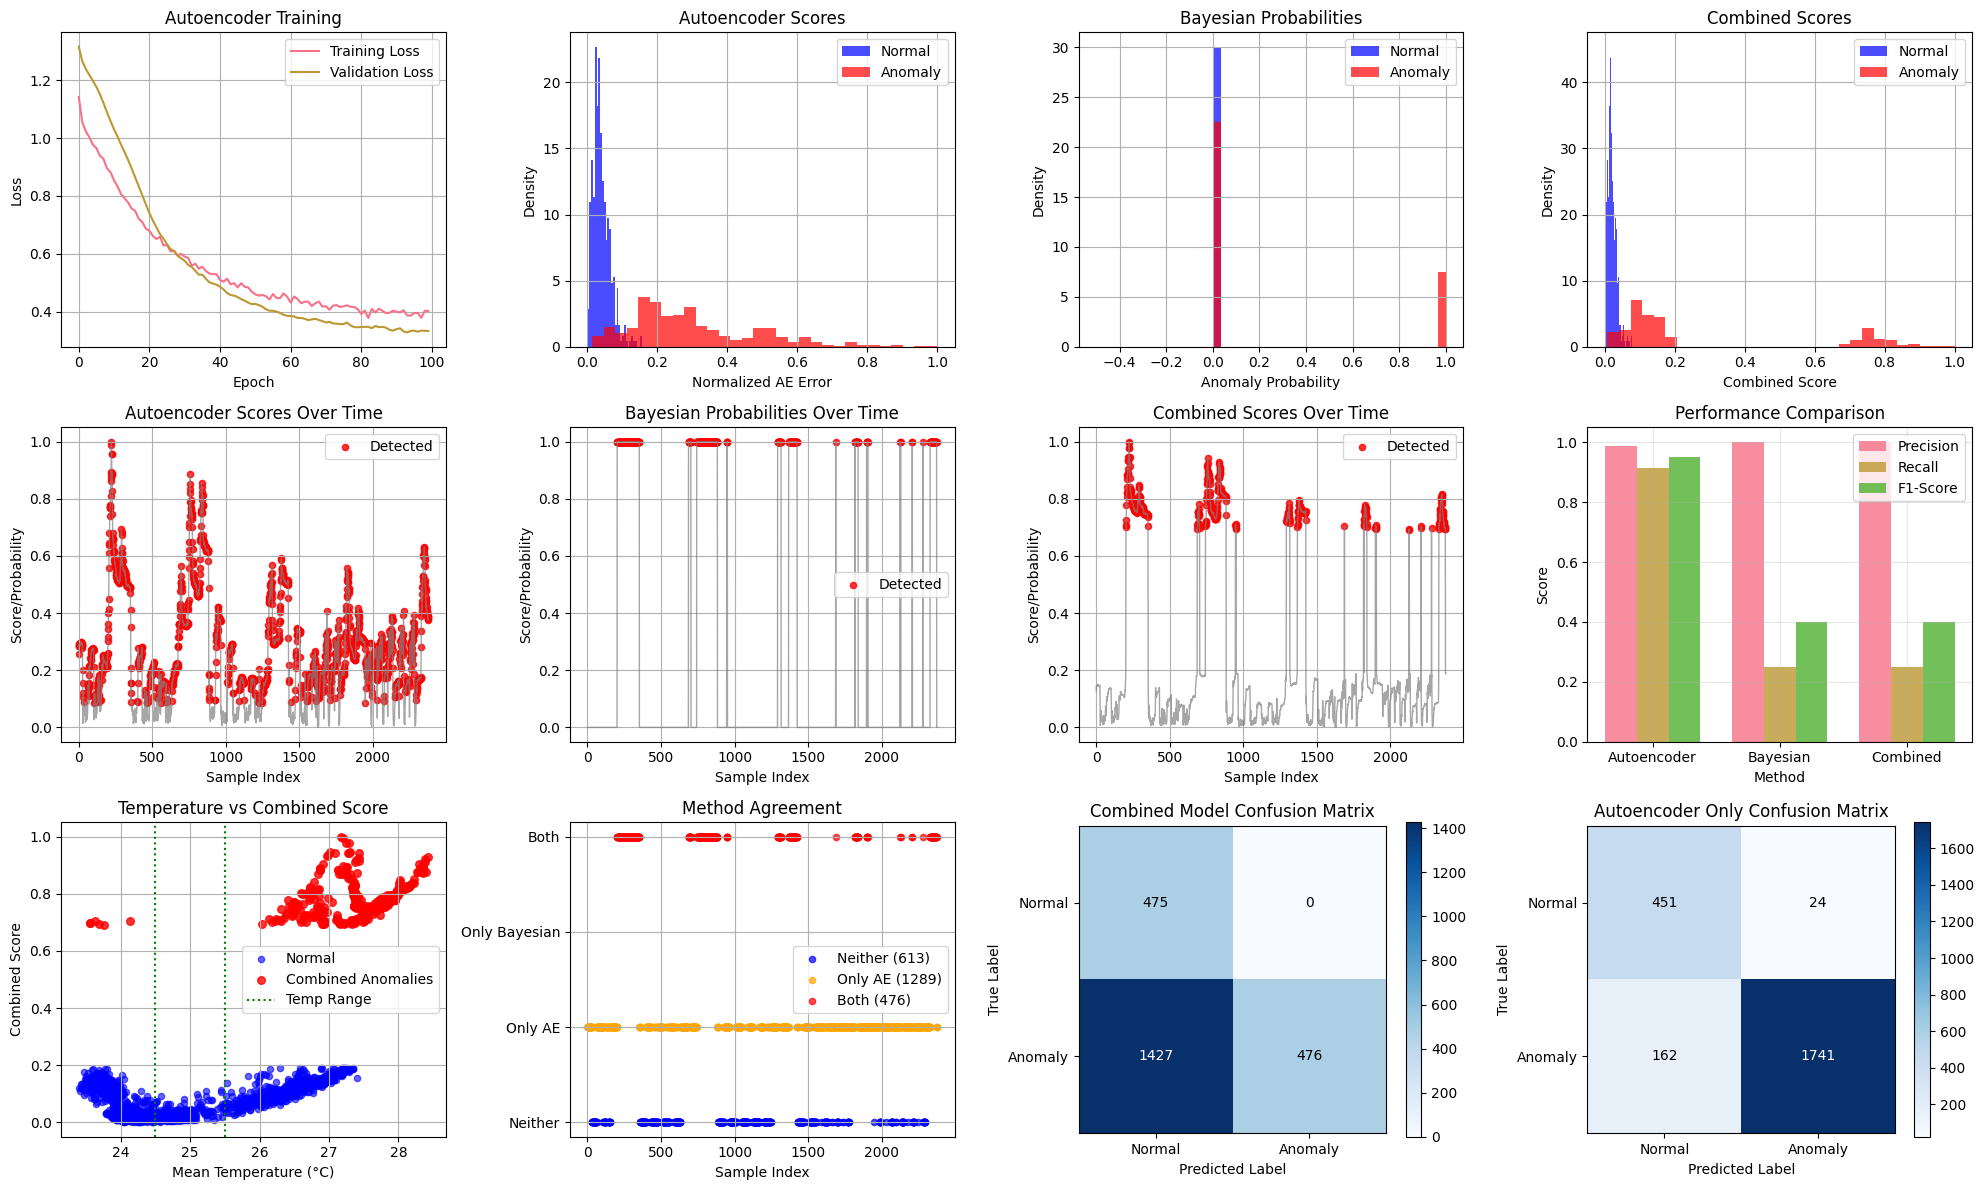

Combined F1-Score: 0.400

Testing weights: AE=0.4, Bayesian=0.6
Training combined model with 20 features
Normal samples: 475, Total samples: 2378
=== TRAINING AUTOENCODER + BAYESIAN FUSION MODEL ===
Building autoencoder...
Training autoencoder on normal data...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.0893 - mae: 0.8140 - val_loss: 1.2443 - val_mae: 0.8714 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.0893 - mae: 0.8140 - val_loss: 1.2443 - val_mae: 0.8714 - learning_rate: 0.0010
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0407 - mae: 0.7996 - val_loss: 1.2082 - val_mae: 0.8616 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0407 - mae: 0.7996 - val_loss: 1.2082 - val_mae: 0.8616 - learning_rate: 0.0010
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0080 - mae: 0.7858 - val_loss: 1.1842 - val_mae: 0.8537 - learning_rate: 0.0010
Epoch 4/100
12/12 ━━━━━━━━━━━━━

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'AE_Error': 'N', 'Temp_Mean': 'N', 'Temp_Var': 'N', 'Temp_Range': 'N', 'Compliance': 'N', 'Anomaly': 'N'}


✅ Bayesian network built successfully
✅ Combined model training completed!

✅ Combined model training completed!

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.986
  Recall: 0.920
  F1-Score: 0.952

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

=== COMBINED MODEL EVALUATION ===

Ae Anomalies:
  Precision: 0.986
  Recall: 0.920
  F1-Score: 0.952

Bayesian Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400

Combined Anomalies:
  Precision: 1.000
  Recall: 0.250
  F1-Score: 0.400


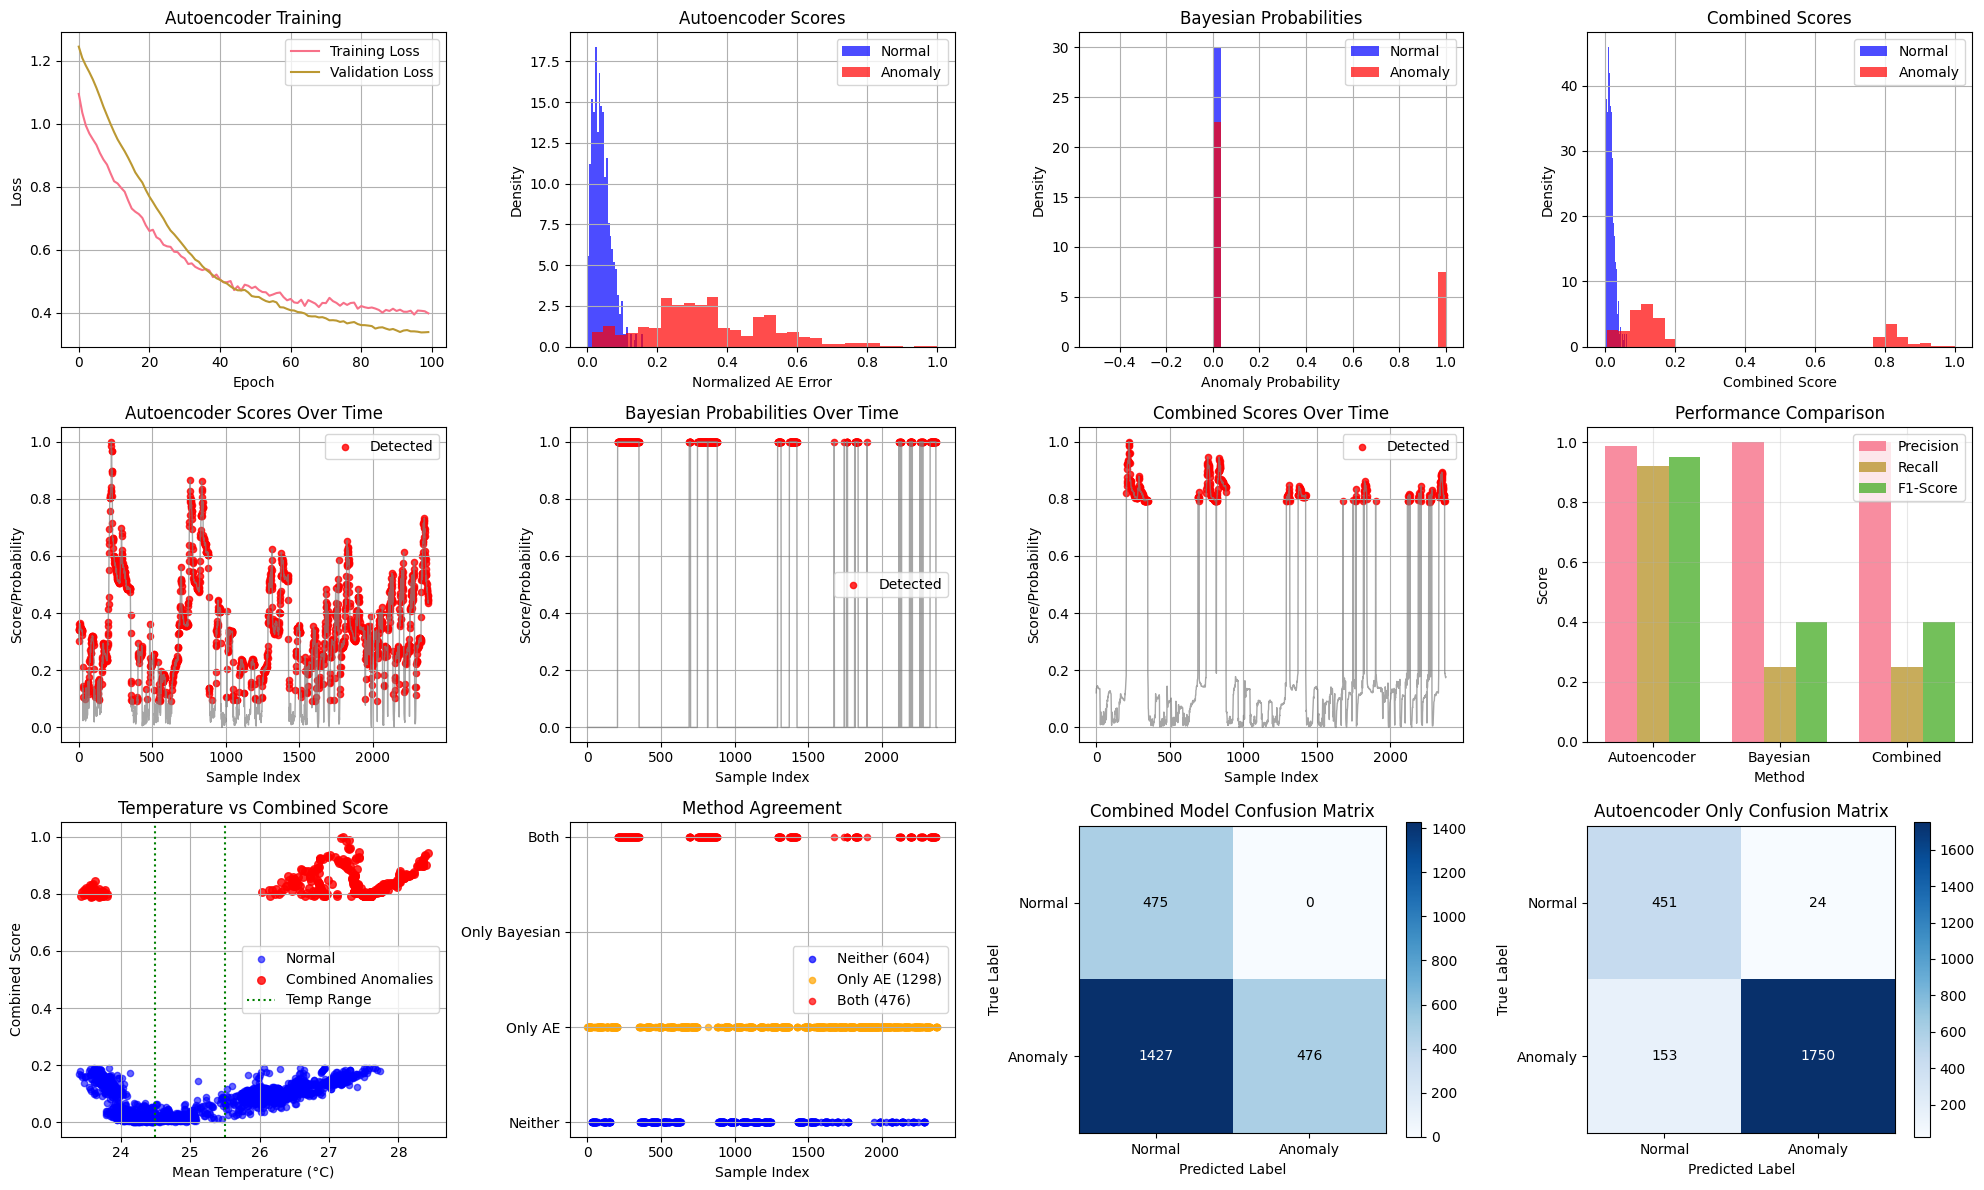

Combined F1-Score: 0.400

=== BEST WEIGHT COMBINATION ===
Best weights: AE=0.7, Bayesian=0.3
Best F1-Score: 0.400

=== WEIGHT COMBINATION SUMMARY ===
Weights (AE, Bay) Precision  Recall   F1-Score  
--------------------------------------------------
(0.7, 0.3)        1.000      0.250    0.400     
(0.6, 0.4)        1.000      0.250    0.400     
(0.5, 0.5)        1.000      0.250    0.400     
(0.4, 0.6)        1.000      0.250    0.400     
✅ Autoencoder + Bayesian Fusion analysis completed!

=== MODEL INSIGHTS ===
Average Bayesian anomaly probability: 0.200
✅ Bayesian network is contributing meaningful predictions
Agreement between AE and Bayesian: 0.453 (45.3%)
Anomalies detected by both methods: 476
Anomalies detected by either method: 1776
Anomalies detected by combined model: 476
Temperature compliance rate for detected anomalies: 0.000 (0.0%)
✅ Most detected anomalies are indeed temperature-related


In [98]:
# Run Autoencoder + Bayesian Fusion Model
print("Starting Autoencoder + Bayesian Fusion anomaly detection...")

# Run the combined model with different weight combinations
print("\n=== TESTING DIFFERENT WEIGHT COMBINATIONS ===")

weight_combinations = [
    (0.7, 0.3),  # Autoencoder-heavy
    (0.6, 0.4),  # Balanced with AE preference
    (0.5, 0.5),  # Equal weights
    (0.4, 0.6),  # Bayesian-heavy
]

best_f1 = 0
best_weights = None
best_results = None
all_results = {}

for ae_weight, bayesian_weight in weight_combinations:
    print(f"\nTesting weights: AE={ae_weight}, Bayesian={bayesian_weight}")
    
    # Train and evaluate the model
    combined_model, evaluations, results = run_autoencoder_bayesian_fusion(
        data_splits, 
        temp_min=TEMP_MIN,
        temp_max=TEMP_MAX,
        ae_weight=ae_weight, 
        bayesian_weight=bayesian_weight,
        epochs=100
    )
    
    # Store results
    combined_f1 = evaluations['combined_anomalies']['f1_score']
    all_results[f"AE{ae_weight}_Bay{bayesian_weight}"] = {
        'evaluations': evaluations,
        'results': results,
        'weights': (ae_weight, bayesian_weight),
        'f1_score': combined_f1
    }
    
    print(f"Combined F1-Score: {combined_f1:.3f}")
    
    # Track best performing combination
    if combined_f1 > best_f1:
        best_f1 = combined_f1
        best_weights = (ae_weight, bayesian_weight)
        best_results = results
        best_model = combined_model

print(f"\n=== BEST WEIGHT COMBINATION ===")
print(f"Best weights: AE={best_weights[0]}, Bayesian={best_weights[1]}")
print(f"Best F1-Score: {best_f1:.3f}")

# Store the best results for comparison with other methods
fusion_anomaly_results = {
    'model': best_model,
    'evaluations': all_results[f"AE{best_weights[0]}_Bay{best_weights[1]}"]['evaluations'],
    'results': best_results,
    'best_weights': best_weights,
    'f1_score': best_f1,
    'precision': all_results[f"AE{best_weights[0]}_Bay{best_weights[1]}"]['evaluations']['combined_anomalies']['precision'],
    'recall': all_results[f"AE{best_weights[0]}_Bay{best_weights[1]}"]['evaluations']['combined_anomalies']['recall'],
    'confusion_matrix': all_results[f"AE{best_weights[0]}_Bay{best_weights[1]}"]['evaluations']['combined_anomalies']['confusion_matrix']
}

# Summary comparison of all weight combinations
print(f"\n=== WEIGHT COMBINATION SUMMARY ===")
print(f"{'Weights (AE, Bay)':<15} {'Precision':<10} {'Recall':<8} {'F1-Score':<10}")
print("-" * 50)

for key, result in all_results.items():
    weights = result['weights']
    eval_combined = result['evaluations']['combined_anomalies']
    print(f"({weights[0]}, {weights[1]}){'':<7} {eval_combined['precision']:<10.3f} {eval_combined['recall']:<8.3f} {eval_combined['f1_score']:<10.3f}")

print("✅ Autoencoder + Bayesian Fusion analysis completed!")

# Additional insights
print(f"\n=== MODEL INSIGHTS ===")
if 'bayesian_probs' in best_results and np.any(best_results['bayesian_probs'] > 0):
    bayesian_contribution = np.mean(best_results['bayesian_probs'])
    print(f"Average Bayesian anomaly probability: {bayesian_contribution:.3f}")
    
    if bayesian_contribution > 0.1:
        print("✅ Bayesian network is contributing meaningful predictions")
    else:
        print("⚠️ Bayesian network shows low activation - consider adjusting parameters")
else:
    print("⚠️ Bayesian component may not be functioning properly")

# Check agreement between methods
ae_anomalies = best_results['ae_anomalies']
bayesian_anomalies = best_results['bayesian_anomalies']
combined_anomalies = best_results['combined_anomalies']

agreement_ae_bay = np.mean(ae_anomalies == bayesian_anomalies)
print(f"Agreement between AE and Bayesian: {agreement_ae_bay:.3f} ({agreement_ae_bay*100:.1f}%)")

both_detect = np.sum(ae_anomalies & bayesian_anomalies)
either_detect = np.sum(ae_anomalies | bayesian_anomalies)
combined_detect = np.sum(combined_anomalies)

print(f"Anomalies detected by both methods: {both_detect}")
print(f"Anomalies detected by either method: {either_detect}")
print(f"Anomalies detected by combined model: {combined_detect}")

# Temperature compliance analysis for detected anomalies
original_data = data_splits['original_data']
mean_temps_combined = original_data.mean(axis=1)[combined_anomalies]

if len(mean_temps_combined) > 0:
    temp_compliance_anomalies = np.mean((mean_temps_combined >= TEMP_MIN) & (mean_temps_combined <= TEMP_MAX))
    print(f"Temperature compliance rate for detected anomalies: {temp_compliance_anomalies:.3f} ({temp_compliance_anomalies*100:.1f}%)")
    
    if temp_compliance_anomalies < 0.5:
        print("✅ Most detected anomalies are indeed temperature-related")
    else:
        print("⚠️ Many detected anomalies have normal temperatures - may indicate other issues")
else:
    print("No anomalies detected by combined model")